In [1]:
# read the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Summary

## Read Data

In [2]:
data = pd.read_csv('Students.csv', encoding='latin-1')

In [3]:
# !pip install xgboost

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Define preprocessors
numeric_features = ['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Awareness_Level']
categorical_features = ['Stream', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [6]:
# Pipelines
dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

In [7]:
X = data.drop('Impact_on_Grades',axis=1)
y=data['Impact_on_Grades']

# encoding target column
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [9]:
X

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,Ishaan,"St. Mira's College for Girls, Pune",Commerce,1,"ChatGPT, Copilot",4.3,"Doubt Solving, Resume Writing",2,Yes,Other,2,No,NaN,Mobile,High
3610,Rudra,Roorkee College of Pharmacy,Pharmacy,3,Copilot,3.0,Content Writing,2,No,Copilot,5,Yes,NaN,Tablet,Poor
3611,Dhruv,"Bahona College, Jorhat",Agriculture,3,Gemini,2.7,"Exam Prep, Notes",2,Yes,Copilot,3,No,NaN,Tablet,Poor
3612,Kabir,Sree Chitra Thirunal College of Engineering,Engineering,4,Gemini,2.7,"Exam Prep, Notes",3,Yes,Gemini,3,No,NaN,Laptop,High


In [10]:

dt_params = {
    'clf__criterion': ['gini', 'entropy','log_loss'],  # or 'log_loss' for newer versions
    'clf__max_depth': [2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 3, 4],
    'clf__min_samples_leaf': [1, 2, 3]
}
rf_params = {'clf__n_estimators': [100], 'clf__max_depth': [5, 10]}
xgb_params = {'clf__n_estimators': [100], 'clf__max_depth': [3, 5], 'clf__learning_rate': [0.1, 0.2]}




# Grid search
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='accuracy')
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring='accuracy')
xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=3, scoring='accuracy')

# Fit and predict
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

# Evaluation
print("Decision Tree Accuracy:", dt_grid.score(X_test, y_test))
print("RandomForest Accuracy:", rf_grid.score(X_test, y_test))
print("XGBoost Accuracy:", xgb_grid.score(X_test, y_test))

Decision Tree Accuracy: 0.2544951590594744
RandomForest Accuracy: 0.6417704011065007
XGBoost Accuracy: 0.5822959889349931


## Top 5

In [11]:
# top 5
data.head()

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium


In [12]:
# sample 20 rows
# data.sample(20)

## Data Dimension

In [13]:
# data shape
data.shape

(3614, 16)

## Data Type

In [14]:
# data types
data.dtypes

Student_Name                  object
College_Name                  object
Stream                        object
Year_of_Study                  int64
AI_Tools_Used                 object
Daily_Usage_Hours            float64
Use_Cases                     object
Trust_in_AI_Tools              int64
Impact_on_Grades               int64
Do_Professors_Allow_Use       object
Preferred_AI_Tool             object
Awareness_Level                int64
Willing_to_Pay_for_Access     object
State                         object
Device_Used                   object
Internet_Access               object
dtype: object

## Statistics

### Numeric

In [15]:
# summary statistics
data.describe()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,2.472883,2.559685,3.023243,0.003320,5.828445
std,1.107912,1.213319,1.436934,2.370706,2.925481
min,1.000000,0.500000,1.000000,-5.000000,1.000000
25%,2.000000,1.500000,2.000000,-2.000000,3.000000
50%,2.000000,2.600000,3.000000,0.000000,6.000000
75%,3.000000,3.600000,4.000000,2.000000,8.000000
max,4.000000,5.000000,5.000000,5.000000,10.000000


### Character

In [16]:
# summary for categorical variables
data.describe(include=['object'])

,Student_Name,College_Name,Stream,AI_Tools_Used,Use_Cases,Do_Professors_Allow_Use,Preferred_AI_Tool,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
count,3614,3614,3614,3614,3614,3614,3614,3614,2000,3614,3614
unique,40,1246,10,9,333,2,6,2,34,3,3
top,Aarav,National Institute of Technology,Science,ChatGPT,"Assignments, Coding Help",No,ChatGPT,No,Maharashtra,Laptop,Medium
freq,91,231,593,626,534,1886,859,1811,106,1336,1260


## NULL values

In [17]:
# missing values
data.isnull().sum()

Student_Name                    0
College_Name                    0
Stream                          0
Year_of_Study                   0
AI_Tools_Used                   0
Daily_Usage_Hours               0
Use_Cases                       0
Trust_in_AI_Tools               0
Impact_on_Grades                0
Do_Professors_Allow_Use         0
Preferred_AI_Tool               0
Awareness_Level                 0
Willing_to_Pay_for_Access       0
State                        1614
Device_Used                     0
Internet_Access                 0
dtype: int64

State is almost 50% with NULL values. Thus drop. But other columns have zero NULL values.

Also drop Student_Name as it's not helpful.

In [18]:
# drop State and Student_Name columns
data_clean = data.drop(columns=['State', 'Student_Name'])

# Exploratory Data Analysis

## Single Variable

In [19]:
# top 5 after cleaning
# data_clean.head()

In [20]:
# data types after cleaning
# data_clean.dtypes

## Function to Draw Plots Automatically

In [21]:
# def auto_plot(data, column_name, figsize=(10, 6), max_categories=20):
#     """
#     Automatically create appropriate plots based on data type
    
#     Parameters:
#     -----------
#     data : pandas.DataFrame
#         The dataframe containing the data
#     column_name : str
#         Name of the column to plot
#     figsize : tuple
#         Figure size for the plot
#     max_categories : int
#         Maximum number of categories to show for categorical data
#     """
    
#     if column_name not in data.columns:
#         print(f"Column '{column_name}' not found in dataframe")
#         return
    
#     # Get the column data
#     col_data = data[column_name].dropna()
    
#     if len(col_data) == 0:
#         print(f"Column '{column_name}' has no valid data")
#         return
    
#     # Determine data type and create appropriate plot
#     plt.figure(figsize=figsize)
    
#     # Check if numeric
#     if pd.api.types.is_numeric_dtype(col_data):
#         unique_values = col_data.nunique()
        
#         # Continuous numeric data (many unique values)
#         if unique_values > 20:
#             # Histogram for continuous data
#             sns.histplot(col_data, kde=True, bins=min(30, unique_values//2))
#             plt.title(f'Distribution of {column_name} (Continuous)')
#             plt.xlabel(column_name)
#             plt.ylabel('Frequency')
            
#             # Add statistics
#             mean_val = col_data.mean()
#             median_val = col_data.median()
#             plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
#             plt.axvline(median_val, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
#             plt.legend()
            
#             print(f"Summary Statistics for {column_name}:")
#             print(f"  Mean: {mean_val:.2f}")
#             print(f"  Median: {median_val:.2f}")
#             print(f"  Std Dev: {col_data.std():.2f}")
#             print(f"  Min: {col_data.min()}")
#             print(f"  Max: {col_data.max()}")
            
#         # Ordinal/discrete numeric data (few unique values)
#         else:
#             # Bar plot for ordinal data
#             value_counts = col_data.value_counts().sort_index()
            
#             plt.bar(range(len(value_counts)), value_counts.values, color='skyblue')
#             plt.title(f'Distribution of {column_name} (Ordinal/Discrete)')
#             plt.xlabel(column_name)
#             plt.ylabel('Count')
#             plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
            
#             # Add count labels on bars
#             for i, v in enumerate(value_counts.values):
#                 plt.text(i, v + max(value_counts.values) * 0.01, str(v), 
#                         ha='center', va='bottom')
            
#             print(f"Value Counts for {column_name}:")
#             for val, count in value_counts.items():
#                 print(f"  {val}: {count} ({count/len(col_data)*100:.1f}%)")
    
#     # Categorical data
#     else:
#         value_counts = col_data.value_counts()
        
#         # Limit number of categories shown
#         if len(value_counts) > max_categories:
#             value_counts = value_counts.head(max_categories)
#             title_suffix = f" (Top {max_categories})"
#         else:
#             title_suffix = ""
        
#         # Horizontal bar plot for better readability of category names
#         if len(value_counts) > 10:
#             plt.figure(figsize=(figsize[0], max(6, len(value_counts) * 0.4)))
#             sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
#             plt.title(f'Distribution of {column_name}{title_suffix}')
#             plt.xlabel('Count')
#             plt.ylabel(column_name)
#         else:
#             # Vertical bar plot for fewer categories
#             plt.bar(range(len(value_counts)), value_counts.values, color='lightcoral')
#             plt.title(f'Distribution of {column_name}{title_suffix}')
#             plt.xlabel(column_name)
#             plt.ylabel('Count')
#             plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
            
#             # Add count labels on bars
#             for i, v in enumerate(value_counts.values):
#                 plt.text(i, v + max(value_counts.values) * 0.01, str(v), 
#                         ha='center', va='bottom')
        
#         print(f"Category Counts for {column_name}:")
#         for cat, count in value_counts.items():
#             print(f"  '{cat}': {count} ({count/len(col_data)*100:.1f}%)")
        
#         if len(data[column_name].value_counts()) > max_categories:
#             print(f"  ... and {len(data[column_name].value_counts()) - max_categories} more categories")
    
#     plt.tight_layout()
#     plt.show()

### Distribution

In [22]:
# # loop through all columns and plot
# for column in data_clean.columns:
#     auto_plot(data_clean, column, figsize=(12, 6), max_categories=20)   

## Draw Each Plot Individually

### College_Name

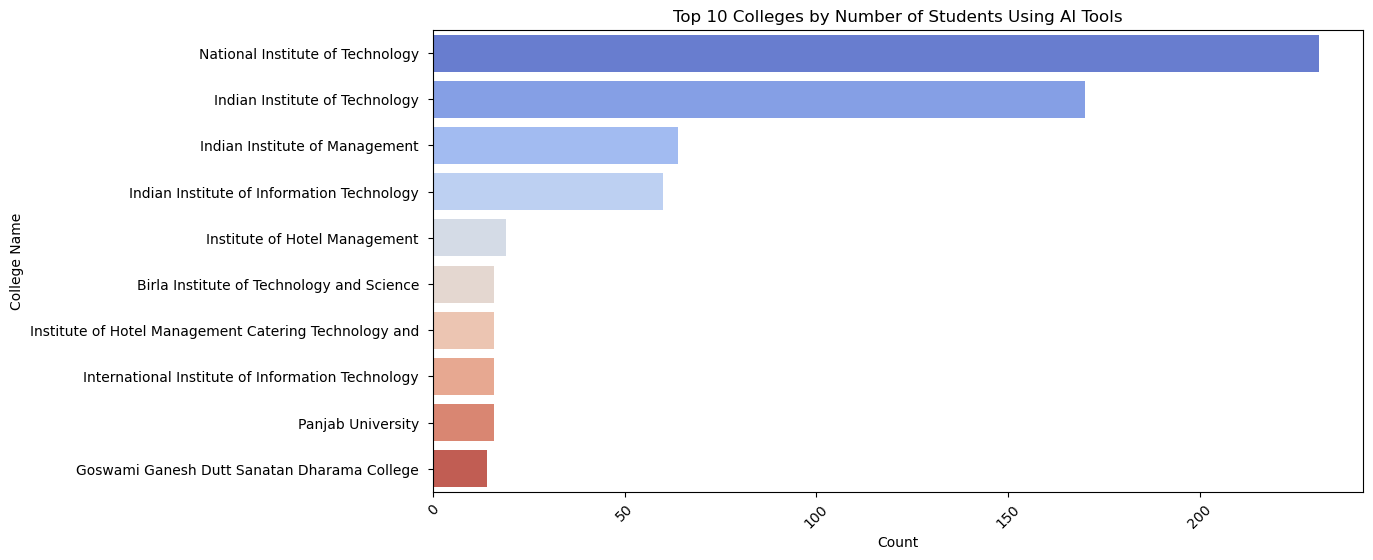

In [23]:
# plot of college name by top 10 
plt.figure(figsize=(12, 6))
top_colleges = data_clean['College_Name'].value_counts().head(10)
sns.barplot(x=top_colleges.values, y=top_colleges.index, palette='coolwarm')
plt.title('Top 10 Colleges by Number of Students Using AI Tools')
plt.xlabel('Count')
plt.ylabel('College Name')
plt.xticks(rotation=45)
plt.show()

In [24]:
# distinct values in College_Name
distinct_colleges = data['College_Name'].nunique()

In [25]:
# print out the number of distinct colleges
print(f'Number of distinct colleges: {distinct_colleges}')

Number of distinct colleges: 1246


### Stream

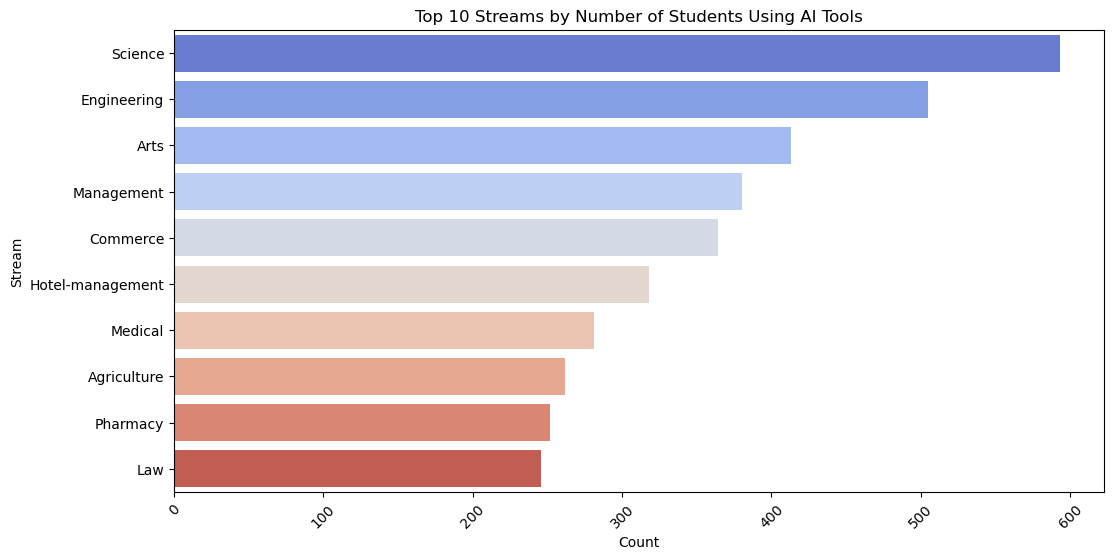

In [26]:
# plot of college name by top 10 
plt.figure(figsize=(12, 6))
top_colleges = data_clean['Stream'].value_counts().head(10)
sns.barplot(x=top_colleges.values, y=top_colleges.index, palette='coolwarm')
plt.title('Top 10 Streams by Number of Students Using AI Tools')
plt.xlabel('Count')
plt.ylabel('Stream')
plt.xticks(rotation=45)
plt.show()

### Year_of_Study

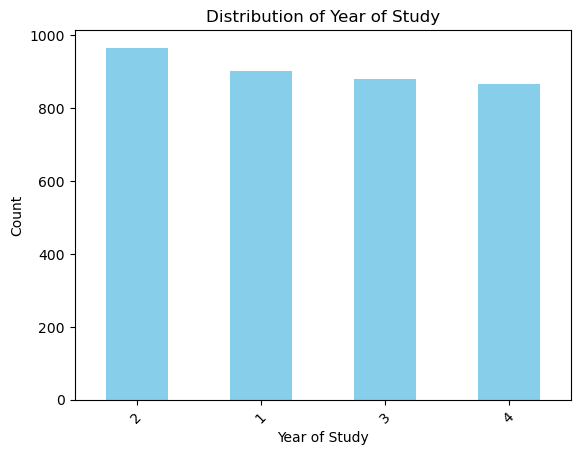

In [27]:
# distribution of Trust_in_AI_Tools
data_clean['Year_of_Study'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Year of Study')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### AI_Tools_Used

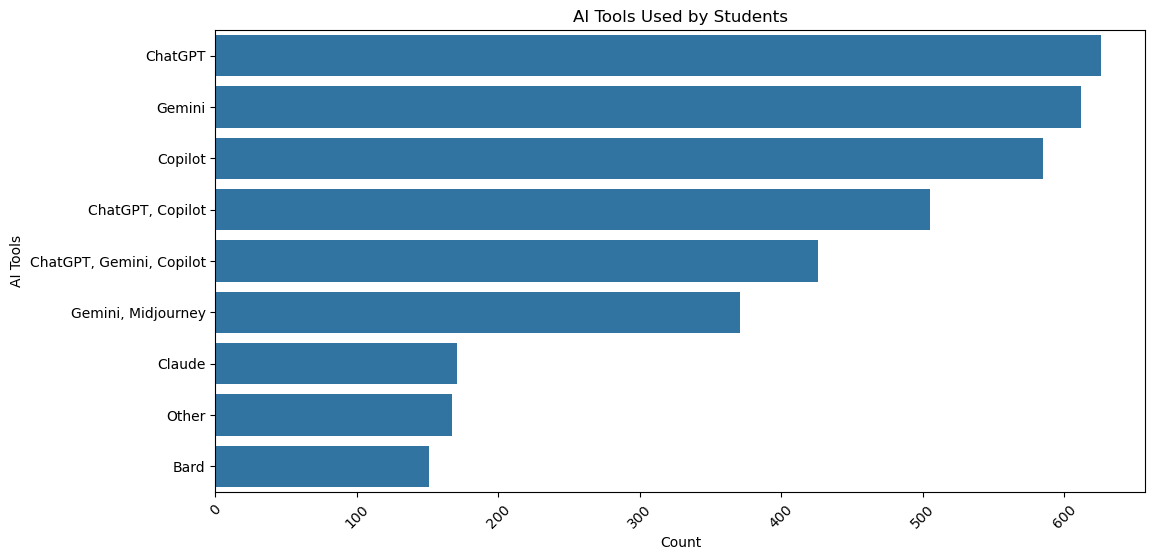

In [28]:
# plot AI_Tools_Used 
plt.figure(figsize=(12, 6))
sns.countplot(y='AI_Tools_Used', data=data_clean, order=data_clean['AI_Tools_Used'].value_counts().index)
plt.title('AI Tools Used by Students')
plt.xlabel('Count')
plt.ylabel('AI Tools')
plt.xticks(rotation=45)
plt.show()


There are scenarios where multiple tools are used by one student.

In [29]:
# distinct values in AI_Tools_Used and count
# data.groupby('AI_Tools_Used').size().reset_index(name='counts').sort_values(by='counts', ascending=False).values

In [30]:
# distinct_ai_tools

In [31]:
# split by comma and count length
# data['AI_Tools_Used_Count'] = data['AI_Tools_Used'].apply(lambda x: len(str(x).split(', ')))

In [32]:
# data[['AI_Tools_Used', 'AI_Tools_Used_Count']].head(20)

In [33]:
# # split column AI_Tools_Used into multiple columns by comma and count occurrences
# ai_tools_expanded = data['AI_Tools_Used'].str.get_dummies(sep=', ')
# ai_tools_counts = ai_tools_expanded.sum().sort_values(ascending=False)

In [34]:
# top 5
# ai_tools_counts.head()

In [35]:
# # Method 1: Using pandas get_dummies with separator
# def create_ai_tools_dummy_variables(df, column_name='AI_Tools_Used'):
#     """
#     Create dummy variables for comma-separated AI tools column
#     """
#     print("=== CREATING DUMMY VARIABLES FOR AI TOOLS ===")
    
#     # Method 1: Using pandas get_dummies with separator
#     print("Method 1: Using pandas get_dummies")
    
#     # Create dummy variables directly from comma-separated values
#     dummies = df[column_name].str.get_dummies(sep=', ')
    
#     # Add prefix to column names for clarity
#     dummies.columns = [f'ai_tool_{col.lower().replace(" ", "_")}' for col in dummies.columns]
    
#     print(f"Created {len(dummies.columns)} dummy variables:")
#     for col in dummies.columns:
#         print(f"  • {col}: {dummies[col].sum()} students use this tool")
    
#     # Show the dummy variables
#     print(f"\nDummy variables shape: {dummies.shape}")
#     print(f"Sample of dummy variables:")
#     print(dummies.head())
    
#     return dummies

# # Apply to your data
# ai_tools_dummies = create_ai_tools_dummy_variables(data, 'AI_Tools_Used')

In [36]:
# ai_tools_dummies.iloc[518, :10]

### Daily_Usage_Hours

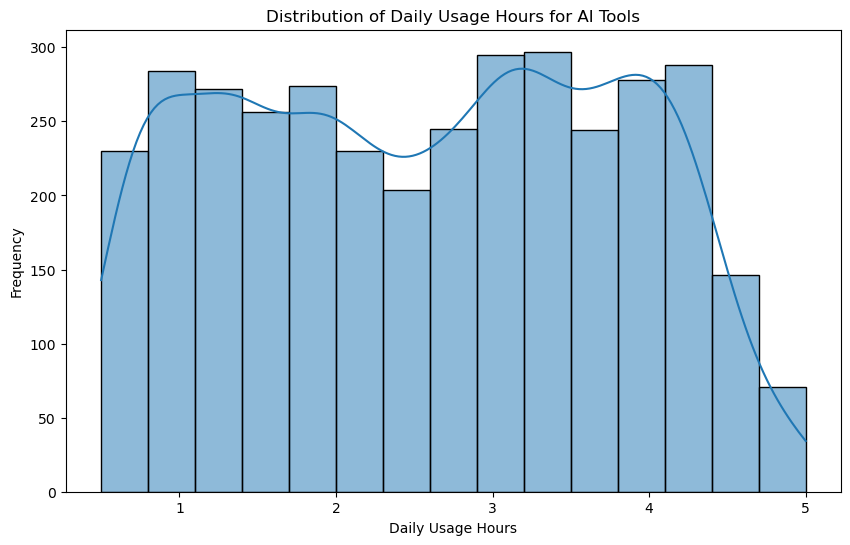

In [37]:
# Analyze the distribution of Daily_Usage_Hours for AI tools. Calculate mean, median, and standard deviation
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Daily_Usage_Hours'], kde=True, bins=15)
plt.title('Distribution of Daily Usage Hours for AI Tools')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()

### Use_Cases

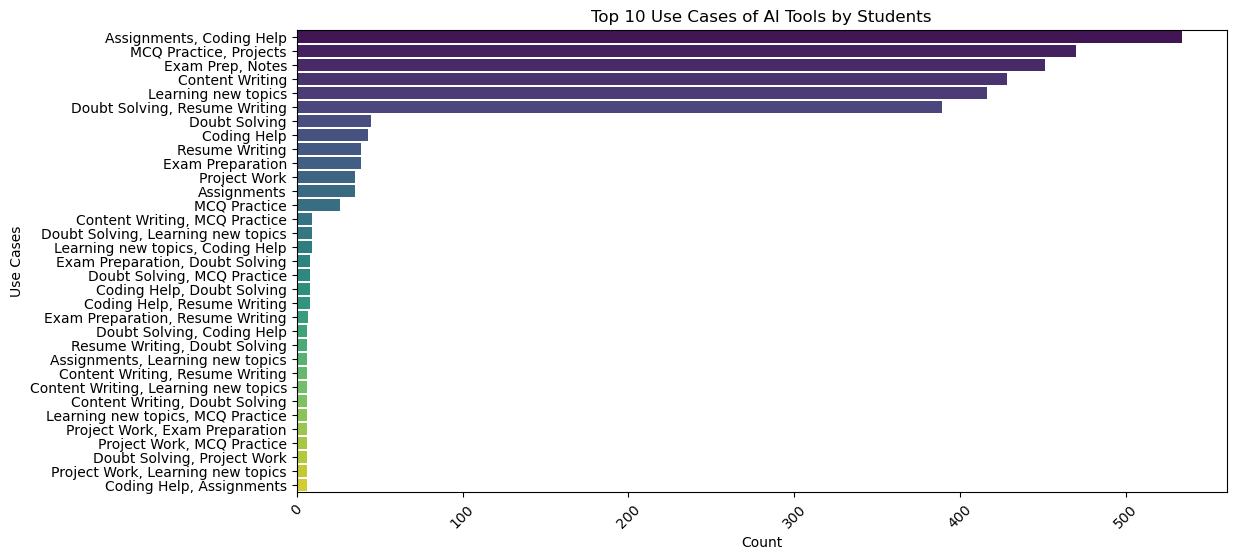

In [38]:
# plot of top 10 different use cases
plt.figure(figsize=(12, 6))
top_use_cases = data_clean['Use_Cases'].value_counts().head(33)
sns.barplot(x=top_use_cases.values, y=top_use_cases.index, palette='viridis')
plt.title('Top 10 Use Cases of AI Tools by Students')
plt.xlabel('Count')
plt.ylabel('Use Cases')
plt.xticks(rotation=45)
plt.show()

The values of "Use_Cases" need to be standardized. For example, "Exam Prep" and "Exam Preparation" are the same.

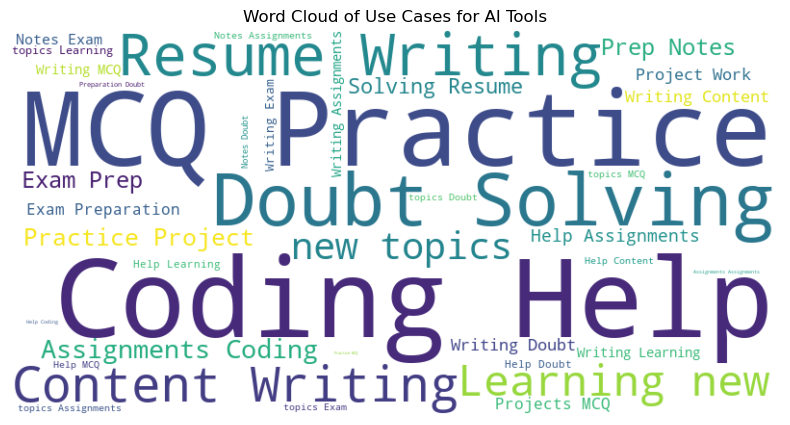

In [39]:
# draw a word cloud for Use_Cases
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Use_Cases'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Use Cases for AI Tools')
plt.show()

The most common use cases for AI are Coding Help, MCQ Practice, Resume Writing, and Doubt Solving.

### Trust_in_AI_Tools

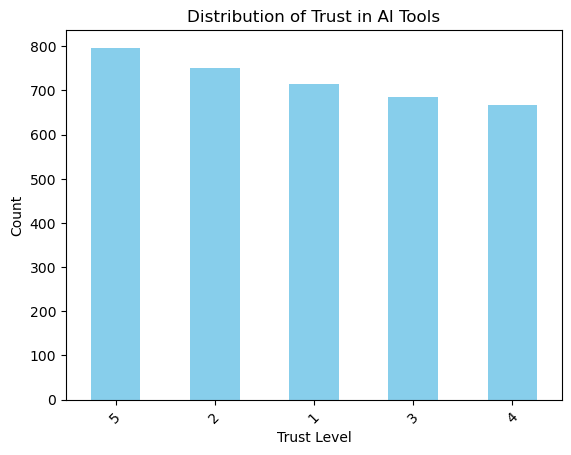

In [40]:
# distribution of Trust_in_AI_Tools
data['Trust_in_AI_Tools'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Trust in AI Tools')
plt.xlabel('Trust Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Numerical but ordinal. 

### Impact_on_Grades

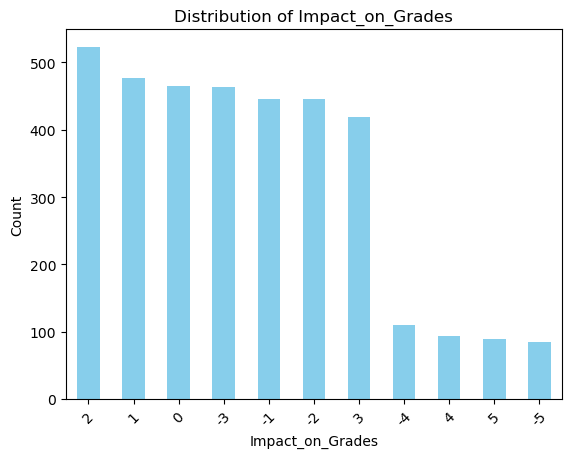

In [41]:
# distribution of Trust_in_AI_Tools
data['Impact_on_Grades'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Impact_on_Grades')
plt.xlabel('Impact_on_Grades')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Numerical but ordinal.

Categorical and need additional mapping.

### Do_Professors_Allow_Use

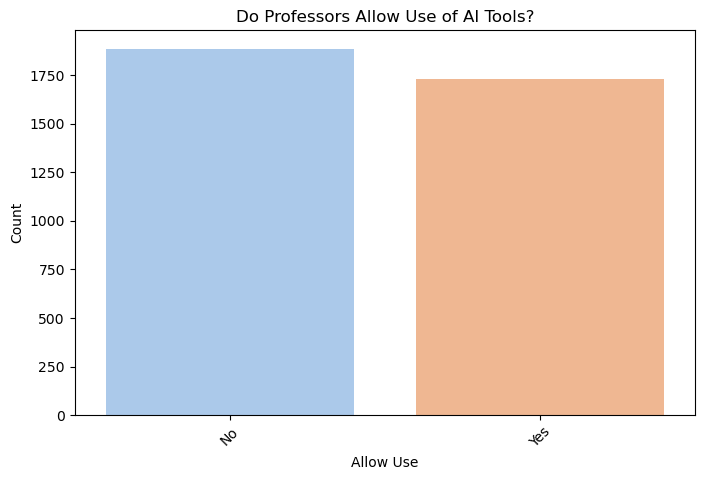

In [42]:
# plot of Do_Professors_Allow_Use
plt.figure(figsize=(8, 5))
sns.countplot(x='Do_Professors_Allow_Use', data=data, palette
='pastel')
plt.title('Do Professors Allow Use of AI Tools?')
plt.xlabel('Allow Use')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Preferred_AI_Tool

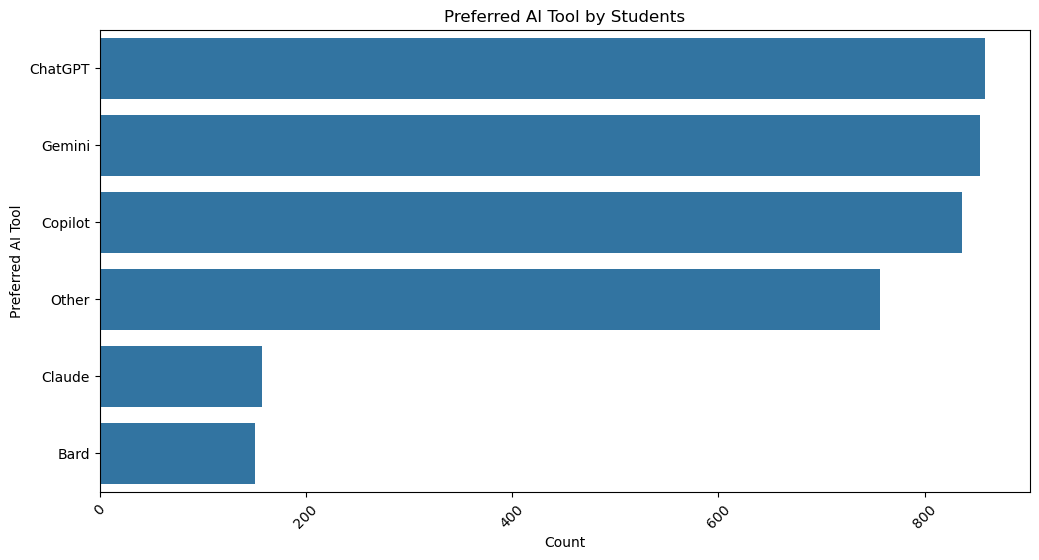

In [43]:
# plot of Preferred_AI_Tool
plt.figure(figsize=(12, 6))
sns.countplot(y='Preferred_AI_Tool', data=data, order=data['Preferred_AI_Tool'].value_counts().index)
plt.title('Preferred AI Tool by Students')
plt.xlabel('Count')
plt.ylabel('Preferred AI Tool')
plt.xticks(rotation=45)
plt.show()

Categorical.

Binary.

## Awareness_Level

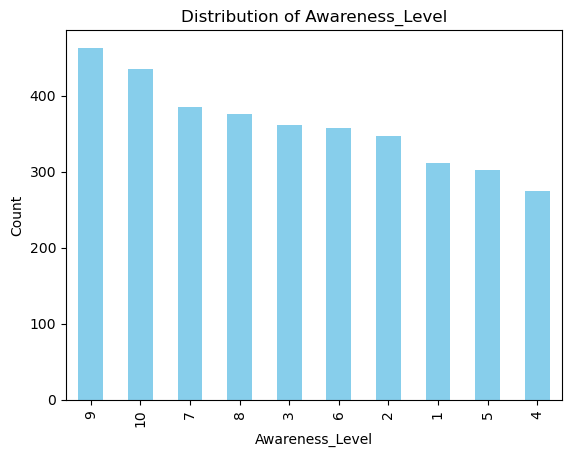

In [44]:
# distribution of Awareness_Level
data['Awareness_Level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Awareness_Level')
plt.xlabel('Awareness_Level')
plt.ylabel('Count')
plt.show()

### Willing_to_Pay_for_Access

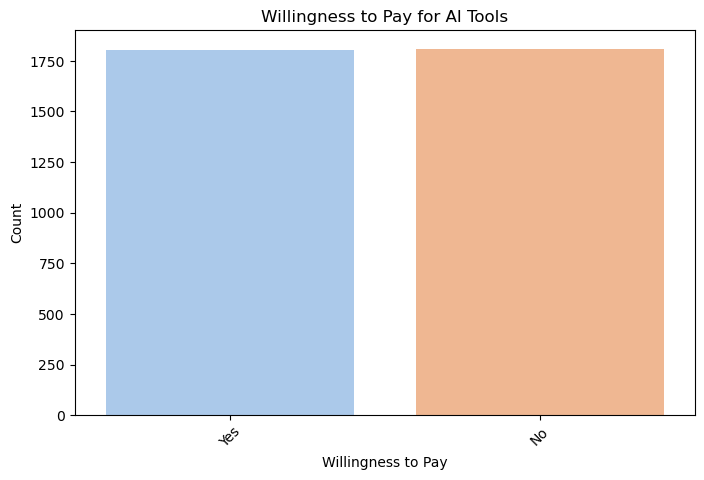

In [45]:
# plot of Willingness to Pay for AI Tools
plt.figure(figsize=(8, 5))
sns.countplot(x='Willing_to_Pay_for_Access', data=data, palette='pastel')
plt.title('Willingness to Pay for AI Tools')
plt.xlabel('Willingness to Pay')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Binary.

### Device_Used

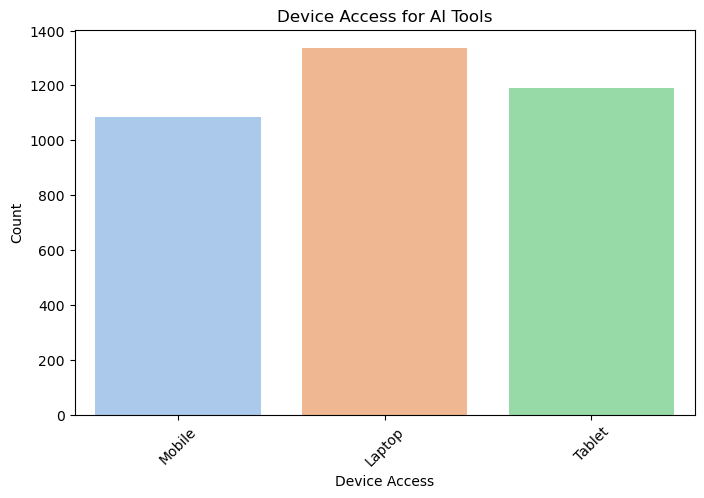

In [46]:
# plot of device_access
plt.figure(figsize=(8, 5))
sns.countplot(x='Device_Used', data=data, palette='pastel')
plt.title('Device Access for AI Tools')
plt.xlabel('Device Access')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Categorical.

### Internet_Access

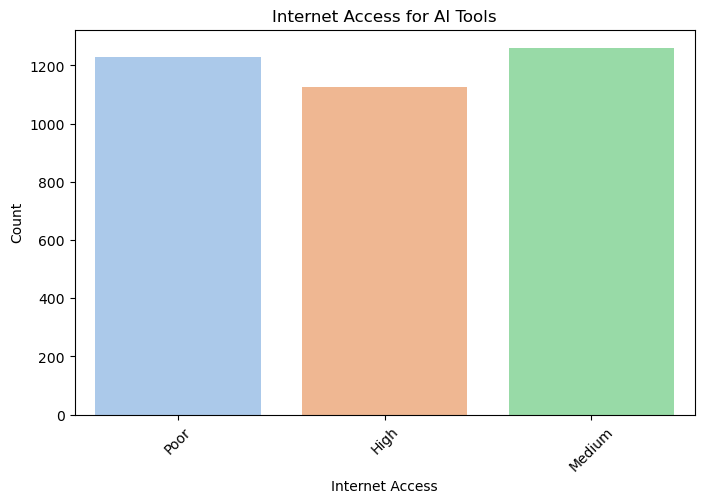

In [47]:
# plot of Internet_Access
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet_Access', data=data, palette='pastel')
plt.title('Internet Access for AI Tools')
plt.xlabel('Internet Access')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Categorical. 

Categorical and need further engineering.

# Data Transformation

## Use_Cases

In [48]:
# group by Use_Cases and count
# data.groupby('Use_Cases').size().reset_index(name='counts').sort_values(by='counts', ascending=False).values

In [49]:
# create a new column for Use_Cases split by a comma 
data_clean['Use_Cases_Split'] = data_clean['Use_Cases'].str.split(',')

In [50]:
# top 5
# data['Use_Cases_Split'].head(50)

In [51]:
import re
from collections import Counter

# First, let's extract all individual use cases from the split data
def extract_all_individual_use_cases(df, column='Use_Cases_Split'):
    """
    Extract all individual use cases from the split column
    """
    all_individual_cases = []
    for case_list in df[column].dropna():
        for case in case_list:
            if case.strip():  # Only add non-empty cases
                all_individual_cases.append(case.strip().lower())
    return all_individual_cases

# Get all individual use cases
all_cases = extract_all_individual_use_cases(data_clean)
case_counts = Counter(all_cases)

print("All individual use cases and their frequencies:")
for case, count in case_counts.most_common():
    print(f"'{case}': {count}")

All individual use cases and their frequencies:
'coding help': 766
'assignments': 749
'mcq practice': 692
'doubt solving': 638
'resume writing': 617
'content writing': 602
'learning new topics': 594
'projects': 470
'exam prep': 451
'notes': 451
'project work': 229
'exam preparation': 202


In [52]:
# # Get all individual use cases
# all_cases = extract_all_individual_use_cases(data, column='AI_Tools_Used')
# case_counts = Counter(all_cases)

# print("All individual use cases and their frequencies:")
# for case, count in case_counts.most_common():
#     print(f"'{case}': {count}")

In [53]:
# Create a comprehensive mapping for standardizing individual use cases
def create_use_case_mapping():
    """
    Create a mapping dictionary to standardize similar use cases
    """
    mapping = {
        # Exam related
        'exam prep': 'exam preparation',
        'exam preparation': 'exam preparation',
        
        # Project related
        'projects': 'project work',
        'project work': 'project work',
        'project': 'project work'
    }
    
    return mapping

# Apply the mapping to standardize individual use cases
use_case_mapping = create_use_case_mapping()

def standardize_individual_use_cases(df):
    """
    Standardize individual use cases using the mapping
    """
    def apply_mapping_to_list(case_list):
        # Handle None/NaN cases
        if case_list is None or (isinstance(case_list, float) and pd.isna(case_list)):
            return case_list
        
        # Handle empty list
        if not isinstance(case_list, list) or len(case_list) == 0:
            return case_list
        
        standardized_cases = []
        for case in case_list:
            if case and isinstance(case, str):  # Check if case is not None and is string
                # Clean and normalize the case
                cleaned_case = case.strip().lower()
                # Apply mapping
                standardized_case = use_case_mapping.get(cleaned_case, cleaned_case)
                # Avoid duplicates
                if standardized_case not in standardized_cases:
                    standardized_cases.append(standardized_case)
        
        return standardized_cases
    
    return df['Use_Cases_Split'].apply(apply_mapping_to_list)

# Apply standardization
data_clean['Use_Cases_Split_Standardized'] = standardize_individual_use_cases(data_clean)

# Convert back to string format for easier viewing
data_clean['Use_Cases_Standardized'] = data_clean['Use_Cases_Split_Standardized'].apply(
    lambda x: ', '.join([case.title() for case in x]) if x and isinstance(x, list) else ''
)

In [54]:
# # Get all individual use cases
# all_cases = extract_all_individual_use_cases(data, column='Use_Cases_Split_Standardized')
# case_counts = Counter(all_cases)

# print("All individual use cases and their frequencies:")
# for case, count in case_counts.most_common():
#     print(f"'{case}': {count}")

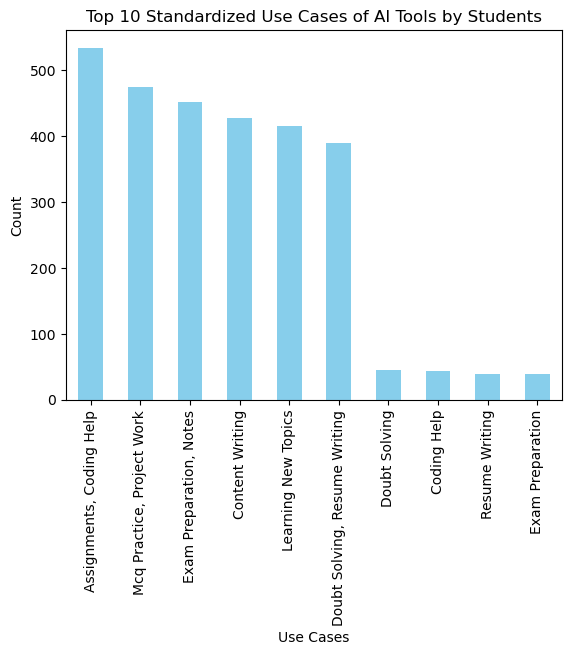

In [55]:
# top 10 use cases
data_clean['Use_Cases_Standardized'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Standardized Use Cases of AI Tools by Students')
plt.xlabel('Use Cases')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [56]:
# top 10 rows
data_clean.head(5)

,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access,Use_Cases_Split,Use_Cases_Split_Standardized,Use_Cases_Standardized
0,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Mobile,Poor,"[Assignments, Coding Help]","[assignments, coding help]","Assignments, Coding Help"
1,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Laptop,Poor,[Learning new topics],[learning new topics],Learning New Topics
2,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Tablet,Poor,"[MCQ Practice, Projects]","[mcq practice, project work]","Mcq Practice, Project Work"
3,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Laptop,High,[Content Writing],[content writing],Content Writing
4,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Laptop,Medium,"[Doubt Solving, Resume Writing]","[doubt solving, resume writing]","Doubt Solving, Resume Writing"


In [57]:
# length of Use_Cases_Split
# data['Use_Cases_Length'] = data['Use_Cases_Split'].apply(len)

In [58]:
# # max length of Use_Cases_Length
# max_length = data['Use_Cases_Length'].max()
# print(f'Maximum number of use cases per student: {max_length}')

The maximum length is three.

In [59]:
# # count by use cases
# use_cases_count = data['Use_Cases'].value_counts()

# use_cases_count

In [60]:
# # top 10 use cases
# top_10_use_cases = use_cases_count.head(10)
# print("Top 10 Use Cases of AI Tools by Students:")
# for use_case, count in top_10_use_cases.items():
#     print(f"{use_case}")

In [61]:
# !pip install fuzzywuzzy python-levenshtein

In [62]:
# # Install fuzzywuzzy if not already installed
# # !pip install fuzzywuzzy python-levenshtein

# from fuzzywuzzy import fuzz, process

# def advanced_standardize_use_cases(df, similarity_threshold=80):
#     """
#     Advanced standardization using fuzzy string matching
#     """
#     # Get all unique terms
#     all_terms = set()
#     for use_case_string in df['Use_Cases'].dropna():
#         terms = [term.strip().lower() for term in use_case_string.split(',')]
#         all_terms.update(terms)
    
#     all_terms = list(all_terms)
    
#     # Group similar terms
#     term_groups = {}
#     processed_terms = set()
    
#     for term in all_terms:
#         if term in processed_terms:
#             continue
            
#         # Find similar terms
#         similar_terms = [term]
#         for other_term in all_terms:
#             if other_term != term and other_term not in processed_terms:
#                 if fuzz.ratio(term, other_term) >= similarity_threshold:
#                     similar_terms.append(other_term)
        
#         # Use the shortest term as the standard
#         standard_term = min(similar_terms, key=len)
        
#         for similar_term in similar_terms:
#             term_groups[similar_term] = standard_term
#             processed_terms.add(similar_term)
    
#     # Apply standardization
#     def standardize_row(use_case_string):
#         if pd.isna(use_case_string):
#             return use_case_string
        
#         terms = [term.strip().lower() for term in use_case_string.split(',')]
#         standardized = [term_groups.get(term, term) for term in terms]
        
#         # Remove duplicates and return
#         unique_terms = list(dict.fromkeys(standardized))
#         return ', '.join([term.title() for term in unique_terms])
    
#     return df['Use_Cases'].apply(standardize_row)

# # Apply advanced standardization
# data['Use_Cases_Advanced'] = advanced_standardize_use_cases(data)

In [63]:
# # check top 10 use cases after advanced standardization
# use_cases_count_advanced = data['Use_Cases_Advanced'].value_counts()

# # Display the top 10 use cases after advanced standardization
# top_10_use_cases_advanced = use_cases_count_advanced.head(10)

In [64]:
# top_10_use_cases_advanced

In [65]:
# !pip install wordcloud

In [66]:
# data['Use_Cases'].value_counts().sort_values(ascending=False).head(10)

## AI_Tools_Used

In [67]:
data_clean.head(5)

,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access,Use_Cases_Split,Use_Cases_Split_Standardized,Use_Cases_Standardized
0,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Mobile,Poor,"[Assignments, Coding Help]","[assignments, coding help]","Assignments, Coding Help"
1,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Laptop,Poor,[Learning new topics],[learning new topics],Learning New Topics
2,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Tablet,Poor,"[MCQ Practice, Projects]","[mcq practice, project work]","Mcq Practice, Project Work"
3,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Laptop,High,[Content Writing],[content writing],Content Writing
4,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Laptop,Medium,"[Doubt Solving, Resume Writing]","[doubt solving, resume writing]","Doubt Solving, Resume Writing"


In [68]:
# column names
data_clean.columns

Index(['College_Name', 'Stream', 'Year_of_Study', 'AI_Tools_Used',
       'Daily_Usage_Hours', 'Use_Cases', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
       'Awareness_Level', 'Willing_to_Pay_for_Access', 'Device_Used',
       'Internet_Access', 'Use_Cases_Split', 'Use_Cases_Split_Standardized',
       'Use_Cases_Standardized'],
      dtype='object')

In [69]:
def create_ai_tools_dummy_variables(df, column_name='AI_Tools_Used'):
    """
    Create dummy variables for comma-separated AI tools column
    """
    print("=== CREATING DUMMY VARIABLES FOR AI TOOLS ===")
    
    # Method 1: Using pandas get_dummies with separator
    print("Method 1: Using pandas get_dummies")
    
    # Create dummy variables directly from comma-separated values
    dummies = df[column_name].str.get_dummies(sep=', ')
    
    # Add prefix to column names for clarity
    dummies.columns = [f'ai_tool_{col.lower().replace(" ", "_")}' for col in dummies.columns]
    
    print(f"Created {len(dummies.columns)} dummy variables:")
    for col in dummies.columns:
        print(f"  • {col}: {dummies[col].sum()} students use this tool")
    
    # Show the dummy variables
    print(f"\nDummy variables shape: {dummies.shape}")
    print(f"Sample of dummy variables:")
    print(dummies.head())
    
    return dummies

# Apply the AI Tools dummy variables function to data_clean
ai_tools_dummies_clean = create_ai_tools_dummy_variables(data_clean, 'AI_Tools_Used') 
# Apply to your data
data_clean_v1 = pd.concat([data_clean, ai_tools_dummies_clean], axis=1)

=== CREATING DUMMY VARIABLES FOR AI TOOLS ===
Method 1: Using pandas get_dummies
Created 7 dummy variables:
  • ai_tool_bard: 151 students use this tool
  • ai_tool_chatgpt: 1557 students use this tool
  • ai_tool_claude: 171 students use this tool
  • ai_tool_copilot: 1516 students use this tool
  • ai_tool_gemini: 1409 students use this tool
  • ai_tool_midjourney: 371 students use this tool
  • ai_tool_other: 167 students use this tool

Dummy variables shape: (3614, 7)
Sample of dummy variables:
   ai_tool_bard  ai_tool_chatgpt  ai_tool_claude  ai_tool_copilot  \
0             0                0               0                0   
1             0                1               0                0   
2             0                0               0                1   
3             0                0               0                1   
4             0                0               0                0   

   ai_tool_gemini  ai_tool_midjourney  ai_tool_other  
0               1         

In [70]:
# top 5 of data clean v1
data_clean_v1.head(5)

,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,...,Use_Cases_Split,Use_Cases_Split_Standardized,Use_Cases_Standardized,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other
0,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,...,"[Assignments, Coding Help]","[assignments, coding help]","Assignments, Coding Help",0,0,0,0,1,0,0
1,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,...,[Learning new topics],[learning new topics],Learning New Topics,0,1,0,0,0,0,0
2,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,...,"[MCQ Practice, Projects]","[mcq practice, project work]","Mcq Practice, Project Work",0,0,0,1,0,0,0
3,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,...,[Content Writing],[content writing],Content Writing,0,0,0,1,0,0,0
4,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,...,"[Doubt Solving, Resume Writing]","[doubt solving, resume writing]","Doubt Solving, Resume Writing",0,0,0,0,1,0,0


In [71]:
# remove 'Student_Name', 'College_Name', 'Use_Cases', 'State', 'Use_Cases_Advanced', 'Use_Cases_Split','Use_Cases_Length', 'Use_Cases_Split_Standardized'
# data_cleaned = data.drop(columns=['College_Name', 'Use_Cases', 'State', 'Use_Cases_Split', 'Use_Cases_Length', 'Use_Cases_Split_Standardized'])

In [72]:
# top 5
# data_cleaned.head()

In [82]:
# Create binary features for each use case
def create_binary_use_case_features(df):
    """
    Create binary columns for each unique use case
    """
    # Get all unique use cases from standardized data
    all_use_cases = ['coding help', 'assignments', 'project work', 'mcq practice', 
                     'exam preparation', 'doubt solving', 'resume writing', 
                     'content writing', 'learning new topics', 'notes']
    
    # Create binary columns
    for use_case in all_use_cases:
        col_name = f'uses_{use_case.replace(" ", "_")}'
        df[col_name] = df['Use_Cases_Split_Standardized'].apply(
            lambda x: 1 if x and use_case in x else 0
        )
    
    return df

# Apply the function
data_clean_v1 = create_binary_use_case_features(data_clean_v1)

# Show the new binary features
binary_features = [col for col in data_clean_v1.columns if col.startswith('uses_')]
print("Binary use case features:")
for feature in binary_features:
    print(f"{feature}: {data_clean_v1[feature].sum()} students")

Binary use case features:
uses_coding_help: 766 students
uses_assignments: 749 students
uses_project_work: 699 students
uses_mcq_practice: 692 students
uses_exam_preparation: 653 students
uses_doubt_solving: 638 students
uses_resume_writing: 617 students
uses_content_writing: 602 students
uses_learning_new_topics: 594 students
uses_notes: 451 students


In [74]:
# top 5
# data.head()

In [75]:
# # Apply the function
# data_cleaned = create_binary_use_case_features(data_cleaned)

# # Show the new binary features
# binary_features = [col for col in data_cleaned.columns if col.startswith('uses_')]
# print("Binary use case features:")
# for feature in binary_features:
#     print(f"{feature}: {data_cleaned[feature].sum()} students")

## Drop Unnecessary Columns

In [83]:
# column names of data clean 
data_clean_v1.columns

Index(['College_Name', 'Stream', 'Year_of_Study', 'AI_Tools_Used',
       'Daily_Usage_Hours', 'Use_Cases', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
       'Awareness_Level', 'Willing_to_Pay_for_Access', 'Device_Used',
       'Internet_Access', 'Use_Cases_Split', 'Use_Cases_Split_Standardized',
       'Use_Cases_Standardized', 'ai_tool_bard', 'ai_tool_chatgpt',
       'ai_tool_claude', 'ai_tool_copilot', 'ai_tool_gemini',
       'ai_tool_midjourney', 'ai_tool_other', 'uses_coding_help',
       'uses_assignments', 'uses_project_work', 'uses_mcq_practice',
       'uses_exam_preparation', 'uses_doubt_solving', 'uses_resume_writing',
       'uses_content_writing', 'uses_learning_new_topics', 'uses_notes'],
      dtype='object')

In [84]:
# remove 'Student_Name', 'College_Name', 'Use_Cases', 'State', 'Use_Cases_Advanced', 'Use_Cases_Split','Use_Cases_Length', 'Use_Cases_Split_Standardized'
data_cleaned_final = data_clean_v1.drop(columns=['College_Name', 'Stream', 'AI_Tools_Used', 'Use_Cases', 'Use_Cases_Split', 'Use_Cases_Length', 'Use_Cases_Split_Standardized', 'Use_Cases_Standardized'])

KeyError: "['Use_Cases_Length'] not found in axis"

In [ ]:
# set panadas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
# top 5
data_cleaned_final.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,uses_notes,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other
0,4,0.9,2,2,No,Copilot,9,Yes,Mobile,Poor,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3.4,3,-3,Yes,Other,6,No,Laptop,Poor,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2,3.6,5,0,No,Gemini,1,No,Tablet,Poor,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,2.9,5,2,Yes,Gemini,5,No,Laptop,High,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0.9,1,3,Yes,Other,8,Yes,Laptop,Medium,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# drop Use_Cases_Standardized column
# data_cleaned = data_cleaned.drop(columns=['Use_Cases_Standardized'])

## One Hot Encoding

In [ ]:
# top 5
data_cleaned_final.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,uses_notes,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other
0,4,0.9,2,2,No,Copilot,9,Yes,Mobile,Poor,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3.4,3,-3,Yes,Other,6,No,Laptop,Poor,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2,3.6,5,0,No,Gemini,1,No,Tablet,Poor,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,2.9,5,2,Yes,Gemini,5,No,Laptop,High,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0.9,1,3,Yes,Other,8,Yes,Laptop,Medium,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
def apply_appropriate_encoding(df):
    """
    Apply the correct encoding strategy for each categorical column
    """
    # 1. ONE-HOT ENCODING for nominal categories
    # nominal_columns = ['Stream', 'AI_Tools_Used', 'Preferred_AI_Tool', 'Device_Used', 'Internet_Access']
    nominal_columns = ['Preferred_AI_Tool', 'Device_Used', 'Internet_Access']
    for col in nominal_columns:
        if col in df.columns:
            # Create dummy variables
            dummies = pd.get_dummies(df[col], prefix=col.lower(), drop_first=False)
            df = pd.concat([df, dummies], axis=1)
            print(f"One-hot encoded {col}: {len(dummies.columns)} features created")
    
    # 2. ORDINAL ENCODING for ordered categories
    # ordinal_mappings = {
    #     'Trust_in_AI_Tools': {
    #         'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5
    #     },
    #     'Impact_on_Grades': {
    #         'Negative': 1, 'No Impact': 2, 'Slightly Positive': 3, 
    #         'Positive': 4, 'Very Positive': 5
    #     }
    # }
    
    # for col, mapping in ordinal_mappings.items():
    #     if col in df.columns:
    #         df[f'{col}_encoded'] = df[col].map(mapping)
    #         print(f"Ordinal encoded {col}: 1-{len(mapping)} scale")
    
    # 3. BINARY ENCODING for yes/no columns
    binary_mappings = {
        'Do_Professors_Allow_Use': {'No': 0, 'Yes': 1},
        'Willing_to_Pay_for_Access': {'No': 0, 'Yes': 1}#,
        #'Internet_Access': {'No': 0, 'Yes': 1}
    }
    
    for col, mapping in binary_mappings.items():
        if col in df.columns:
            df[f'{col}_encoded'] = df[col].map(mapping)
            print(f"Binary encoded {col}: 0/1")
    
    return df

In [ ]:
# Apply encoding strategy
data_encoded = apply_appropriate_encoding(data_cleaned_final)

One-hot encoded Preferred_AI_Tool: 6 features created
One-hot encoded Device_Used: 3 features created
One-hot encoded Internet_Access: 3 features created
Binary encoded Do_Professors_Allow_Use: 0/1
Binary encoded Willing_to_Pay_for_Access: 0/1


In [ ]:
# top 5 of the encoded data
data_encoded.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,uses_notes,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,No,Copilot,9,Yes,Mobile,Poor,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
1,2,3.4,3,-3,Yes,Other,6,No,Laptop,Poor,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0
2,2,3.6,5,0,No,Gemini,1,No,Tablet,Poor,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,2,2.9,5,2,Yes,Gemini,5,No,Laptop,High,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4,1,0.9,1,3,Yes,Other,8,Yes,Laptop,Medium,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1


In [ ]:
def apply_appropriate_encoding(df):
    """
    Apply the correct encoding strategy for each categorical column
    """
    # Make a copy to avoid modifying original
    df = df.copy()
    
    # 1. ONE-HOT ENCODING for nominal categories
    nominal_columns = ['Stream', 'AI_Tools_Used', 'Preferred_AI_Tool', 'Device_Used', 'Internet_Access']
    
    for col in nominal_columns:
        if col in df.columns:
            # Create dummy variables
            dummies = pd.get_dummies(df[col], prefix=col.lower(), drop_first=False)
            df = pd.concat([df, dummies], axis=1)
            print(f"One-hot encoded {col}: {len(dummies.columns)} features created")
    
    # 3. BINARY ENCODING for yes/no columns only
    binary_mappings = {
        'Do_Professors_Allow_Use': {'No': 0, 'Yes': 1},
        'Willing_to_Pay_for_Access': {'No': 0, 'Yes': 1}
    }
    
    for col, mapping in binary_mappings.items():
        if col in df.columns:
            df[f'{col}_encoded'] = df[col].map(mapping)
            print(f"Binary encoded {col}: 0/1")
    
    # 4. Skip Trust_in_AI_Tools and Impact_on_Grades if they're already numerical
    print(f"\nSkipping Trust_in_AI_Tools and Impact_on_Grades - already numerical")
    print(f"Trust_in_AI_Tools type: {df['Trust_in_AI_Tools'].dtype}")
    print(f"Impact_on_Grades type: {df['Impact_on_Grades'].dtype}")
    
    return df

# Apply encoding strategy
data_encoded = apply_appropriate_encoding(data)

# Show the results
print("\nNew encoded columns created:")
encoded_cols = [col for col in data_encoded.columns if any(x in col for x in ['_encoded', 'stream_', 'ai_tools_used_', 'preferred_ai_tool_', 'device_used_', 'internet_access_'])]
print(encoded_cols)

# Display sample of encoded data
print("\nSample of encoded data:")
print(data_encoded[['Trust_in_AI_Tools', 'Impact_on_Grades'] + encoded_cols[:5]].head())

One-hot encoded Stream: 10 features created
One-hot encoded AI_Tools_Used: 9 features created
One-hot encoded Preferred_AI_Tool: 6 features created
One-hot encoded Device_Used: 3 features created
One-hot encoded Internet_Access: 3 features created
Binary encoded Do_Professors_Allow_Use: 0/1
Binary encoded Willing_to_Pay_for_Access: 0/1

Skipping Trust_in_AI_Tools and Impact_on_Grades - already numerical
Trust_in_AI_Tools type: int64
Impact_on_Grades type: int64

New encoded columns created:
['stream_Agriculture', 'stream_Arts', 'stream_Commerce', 'stream_Engineering', 'stream_Hotel-management', 'stream_Law', 'stream_Management', 'stream_Medical', 'stream_Pharmacy', 'stream_Science', 'ai_tools_used_Bard', 'ai_tools_used_ChatGPT', 'ai_tools_used_ChatGPT, Copilot', 'ai_tools_used_ChatGPT, Gemini, Copilot', 'ai_tools_used_Claude', 'ai_tools_used_Copilot', 'ai_tools_used_Gemini', 'ai_tools_used_Gemini, Midjourney', 'ai_tools_used_Other', 'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT'

In [ ]:
# top 5
data_encoded.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,Device_Used,Internet_Access,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,uses_notes,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,No,Copilot,9,Yes,Mobile,Poor,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
1,2,3.4,3,-3,Yes,Other,6,No,Laptop,Poor,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0
2,2,3.6,5,0,No,Gemini,1,No,Tablet,Poor,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,2,2.9,5,2,Yes,Gemini,5,No,Laptop,High,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4,1,0.9,1,3,Yes,Other,8,Yes,Laptop,Medium,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1


In [ ]:
# column names
data_encoded.columns

Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
       'Awareness_Level', 'Willing_to_Pay_for_Access', 'Device_Used',
       'Internet_Access', 'uses_coding_help', 'uses_assignments',
       'uses_project_work', 'uses_mcq_practice', 'uses_exam_preparation',
       'uses_doubt_solving', 'uses_resume_writing', 'uses_content_writing',
       'uses_learning_new_topics', 'uses_notes', 'ai_tool_bard',
       'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot',
       'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other',
       'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT',
       'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot',
       'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other',
       'device_used_Laptop', 'device_used_Mobile', 'device_used_Tablet',
       'internet_access_High', 'internet_access_Medium',
       'internet_access_Poor', 'Do_Professors_Allow_Use_encoded

## Drop Unnecessary Columns

In [ ]:
# remove these columns 'Student_Name', 'College_Name', 'Stream', 'Year_of_Study',
#       'AI_Tools_Used', 'Daily_Usage_Hours', 'Use_Cases', 'Trust_in_AI_Tools',
#       'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
#       'Awareness_Level', 'Willing_to_Pay_for_Access', 'State', 'Device_Used',
#       'Internet_Access', 'Use_Cases_Advanced', 'Use_Cases_Split',
#       'Use_Cases_Length', 'Use_Cases_Split_Standardized',
#       'Use_Cases_Standardized', 
data_encoded_clean = data_encoded.drop(columns=[
    'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
    'Willing_to_Pay_for_Access', 'Device_Used',
       'Internet_Access'
])

In [ ]:
# top 5
data_encoded_clean.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,uses_notes,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded
0,4,0.9,2,2,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
1,2,3.4,3,-3,6,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0
2,2,3.6,5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,2,2.9,5,2,5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
4,1,0.9,1,3,8,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1


In [ ]:
# save it as a csv file
data_encoded_clean.to_csv('Students_Cleaned_Encoded.csv', index=False)

In [ ]:
# # Method 1: Using pandas get_dummies with separator
# def create_ai_tools_dummy_variables(df, column_name='AI_Tools_Used'):
#     """
#     Create dummy variables for comma-separated AI tools column
#     """
#     print("=== CREATING DUMMY VARIABLES FOR AI TOOLS ===")
    
#     # Method 1: Using pandas get_dummies with separator
#     print("Method 1: Using pandas get_dummies")
    
#     # Create dummy variables directly from comma-separated values
#     dummies = df[column_name].str.get_dummies(sep=', ')
    
#     # Add prefix to column names for clarity
#     dummies.columns = [f'ai_tool_{col.lower().replace(" ", "_")}' for col in dummies.columns]
    
#     print(f"Created {len(dummies.columns)} dummy variables:")
#     for col in dummies.columns:
#         print(f"  • {col}: {dummies[col].sum()} students use this tool")
    
#     # Show the dummy variables
#     print(f"\nDummy variables shape: {dummies.shape}")
#     print(f"Sample of dummy variables:")
#     print(dummies.head())
    
#     return dummies

# # Apply to your data
# ai_tools_dummies = create_ai_tools_dummy_variables(data, 'AI_Tools_Used')

In [ ]:
# join ai_tools_dummies to data_encoded_clean
# data_final = pd.concat([data_encoded_clean, ai_tools_dummies], axis=1)

In [ ]:
# top 5
# data_final.head()

In [ ]:
# column names
# data_final.columns

In [ ]:
# # remove  'stream_Agriculture', 'stream_Arts', 'stream_Commerce',
# #       'stream_Engineering', 'stream_Hotel-management', 'stream_Law',
# #       'stream_Management', 'stream_Medical', 'stream_Pharmacy',
# #       'stream_Science', 'ai_tools_used_Bard', 'ai_tools_used_ChatGPT',
# #       'ai_tools_used_ChatGPT, Copilot',
# #      'ai_tools_used_ChatGPT, Gemini, Copilot', 'ai_tools_used_Claude',
# #       'ai_tools_used_Copilot', 'ai_tools_used_Gemini',
# #       'ai_tools_used_Gemini, Midjourney', 'ai_tools_used_Other'
# data_model = data_final.drop(columns=[ 'stream_Agriculture', 'stream_Arts', 'stream_Commerce',
#        'stream_Engineering', 'stream_Hotel-management', 'stream_Law',
#        'stream_Management', 'stream_Medical', 'stream_Pharmacy',
#          'stream_Science', 'ai_tools_used_Bard', 'ai_tools_used_ChatGPT',
#          'ai_tools_used_ChatGPT, Copilot',
#             'ai_tools_used_ChatGPT, Gemini, Copilot', 'ai_tools_used_Claude',
#             'ai_tools_used_Copilot', 'ai_tools_used_Gemini', 
#             'ai_tools_used_Gemini, Midjourney', 'ai_tools_used_Other'])


In [ ]:
# column names
data_encoded_clean.columns

Index(['Year_of_Study', 'Daily_Usage_Hours', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Awareness_Level', 'uses_coding_help',
       'uses_assignments', 'uses_project_work', 'uses_mcq_practice',
       'uses_exam_preparation', 'uses_doubt_solving', 'uses_resume_writing',
       'uses_content_writing', 'uses_learning_new_topics', 'uses_notes',
       'ai_tool_bard', 'ai_tool_chatgpt', 'ai_tool_claude', 'ai_tool_copilot',
       'ai_tool_gemini', 'ai_tool_midjourney', 'ai_tool_other',
       'preferred_ai_tool_Bard', 'preferred_ai_tool_ChatGPT',
       'preferred_ai_tool_Claude', 'preferred_ai_tool_Copilot',
       'preferred_ai_tool_Gemini', 'preferred_ai_tool_Other',
       'device_used_Laptop', 'device_used_Mobile', 'device_used_Tablet',
       'internet_access_High', 'internet_access_Medium',
       'internet_access_Poor', 'Do_Professors_Allow_Use_encoded',
       'Willing_to_Pay_for_Access_encoded'],
      dtype='object')

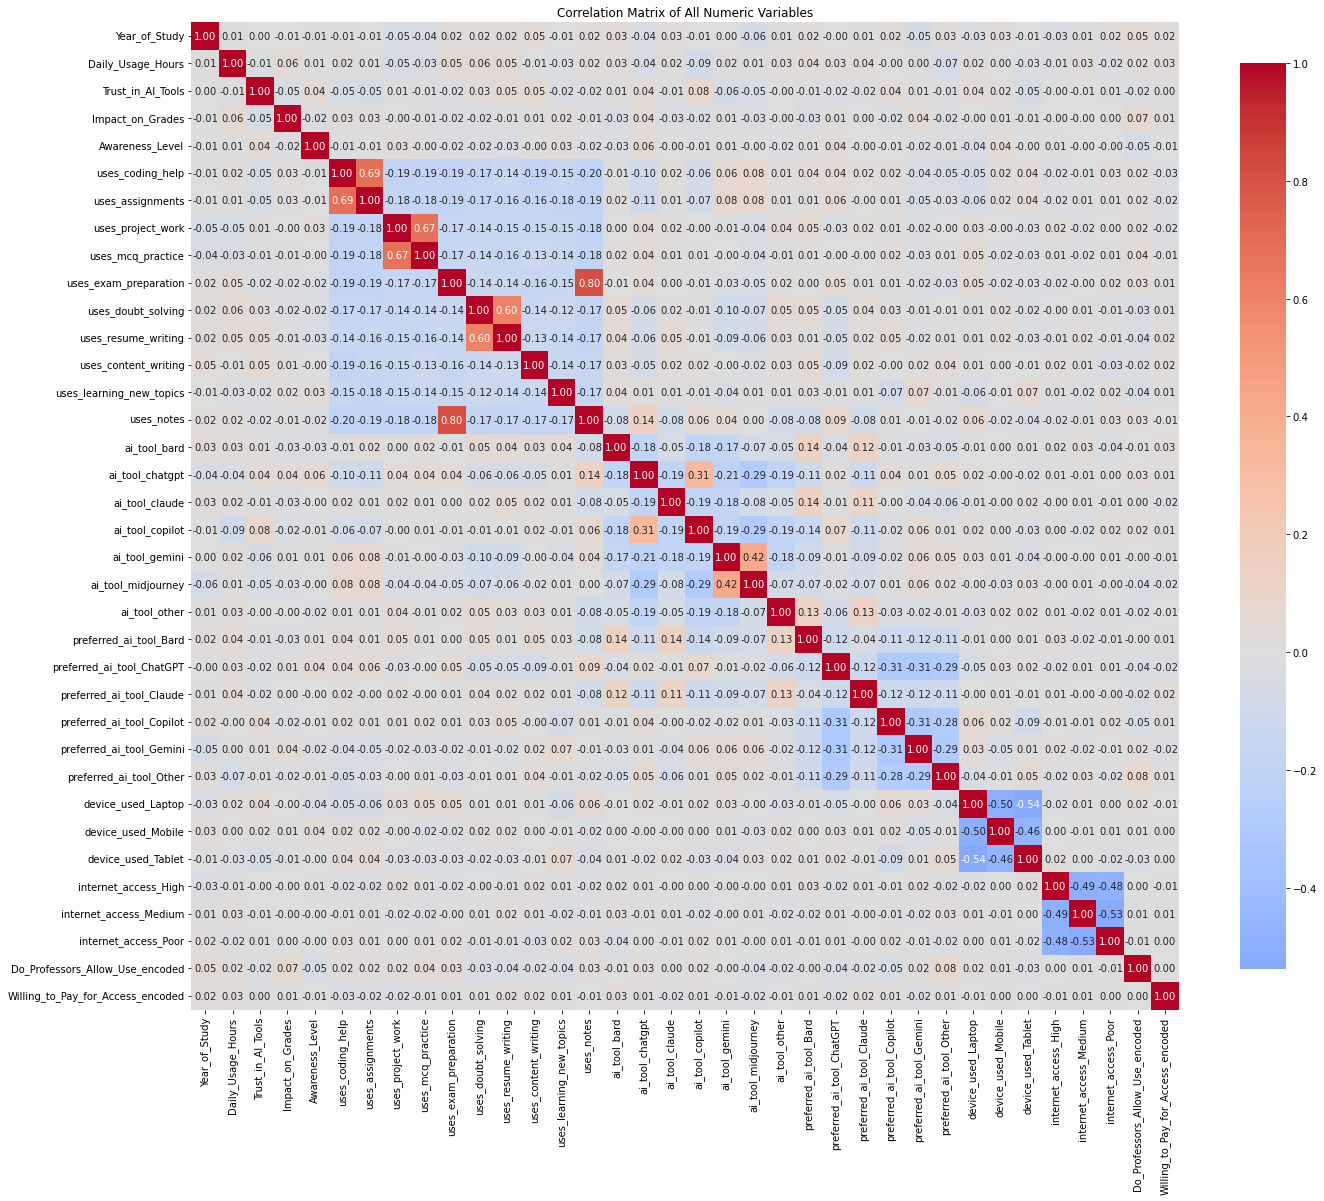

In [ ]:
# Basic correlation heatmap
def create_correlation_heatmap(data, figsize=(20, 18)):
    """
    Create a correlation heatmap for all numeric variables
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, 
                annot=True,           # Show correlation values
                cmap='coolwarm',      # Color scheme
                center=0,             # Center colormap at 0
                square=True,          # Square aspect ratio
                fmt='.2f',            # Format numbers to 2 decimal places
                cbar_kws={"shrink": .8})
    
    plt.title('Correlation Matrix of All Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# Create basic correlation heatmap
corr_matrix = create_correlation_heatmap(data_encoded_clean)

## Modelling

In [ ]:
# 4. Advanced modeling approach
def advanced_modeling_pipeline(data, target_col='Daily_Usage_Hours'):
    """
    Comprehensive modeling pipeline
    """
    print("=== ADVANCED MODELING PIPELINE ===")
    
    # Prepare data
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # 1. Feature Selection
    from sklearn.feature_selection import SelectKBest, f_regression, RFE
    from sklearn.ensemble import RandomForestRegressor
    
    # Statistical feature selection
    selector = SelectKBest(score_func=f_regression, k=20)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    
    print(f"Selected {len(selected_features)} features using statistical selection")
    
    # 2. Model with hyperparameter tuning
    from sklearn.model_selection import GridSearchCV, cross_val_score
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import ElasticNet
    
    models = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.1, 0.05],
                'max_depth': [3, 5]
            }
        },
        'ElasticNet': {
            'model': ElasticNet(random_state=42),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }
    }
    
    # Grid search for best models
    best_models = {}
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, test_size=0.2, random_state=42
    )
    
    for name, model_info in models.items():
        print(f"\nOptimizing {name}...")
        
        grid_search = GridSearchCV(
            model_info['model'], 
            model_info['params'],
            cv=5,
            scoring='r2',
            n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
        
        print(f"  Best parameters: {grid_search.best_params_}")
        print(f"  CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        
        best_models[name] = {
            'model': best_model,
            'cv_score': cv_scores.mean(),
            'params': grid_search.best_params_
        }
    
    return best_models, selected_features

# Run advanced modeling
best_models, top_features = advanced_modeling_pipeline(data_encoded_clean)

=== ADVANCED MODELING PIPELINE ===
Selected 20 features using statistical selection

Optimizing Random Forest...
  Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  CV R²: 0.2063 (±0.0200)

Optimizing Gradient Boosting...
  Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
  CV R²: 0.0697 (±0.0476)

Optimizing ElasticNet...
  Best parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
  CV R²: 0.0104 (±0.0066)


## Feature Selection & Reduce Correlation

### Identify and Handle High Correlations

In [ ]:
# Identify highly correlated feature pairs
def identify_correlation_issues(data, threshold=0.8):
    """
    Identify features with high correlations that need attention
    """
    print("=== IDENTIFYING CORRELATION ISSUES ===")
    
    # Calculate correlation matrix
    corr_matrix = data.corr()
    
    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > threshold:
                high_corr_pairs.append({
                    'Feature_1': corr_matrix.columns[i],
                    'Feature_2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j],
                    'Abs_Correlation': corr_val
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df = high_corr_df.sort_values('Abs_Correlation', ascending=False)
        
        print(f"Found {len(high_corr_df)} highly correlated pairs (>{threshold}):")
        for _, row in high_corr_df.iterrows():
            print(f"  {row['Feature_1']} ↔ {row['Feature_2']}: {row['Correlation']:.3f}")
        
        return high_corr_df
    else:
        print("No highly correlated pairs found!")
        return pd.DataFrame()

# Run correlation analysis
correlation_issues = identify_correlation_issues(data_encoded_clean)

=== IDENTIFYING CORRELATION ISSUES ===
Found 1 highly correlated pairs (>0.8):
  uses_exam_preparation ↔ uses_notes: 0.804


In [ ]:
# Step 2: Remove redundant features intelligently
def remove_redundant_features(data, target_col='Daily_Usage_Hours'):
    """
    Remove redundant features intelligently
    """
    print("=== REMOVING REDUNDANT FEATURES ===")
    
    data_cleaned = data.copy()
    
    # Handle the highly correlated pair: uses_exam_preparation ↔ uses_notes (0.804)
    if 'uses_exam_preparation' in data_cleaned.columns and 'uses_notes' in data_cleaned.columns:
        # Check which one has higher correlation with target
        exam_prep_corr = abs(data_cleaned['uses_exam_preparation'].corr(data_cleaned[target_col]))
        notes_corr = abs(data_cleaned['uses_notes'].corr(data_cleaned[target_col]))
        
        print(f"Target correlations:")
        print(f"  uses_exam_preparation: {exam_prep_corr:.4f}")
        print(f"  uses_notes: {notes_corr:.4f}")
        
        # Option 1: Create composite feature (academic study activities)
        data_cleaned['academic_study_composite'] = ((
            data_cleaned['uses_exam_preparation'] == 1) | 
            (data_cleaned['uses_notes'] == 1)
        ).astype(int)
        
        # Remove both original features to eliminate correlation
        data_cleaned = data_cleaned.drop(columns=['uses_exam_preparation', 'uses_notes'])
        
        composite_count = data_cleaned['academic_study_composite'].sum()
        total_students = len(data_cleaned)
        
        print(f"✅ Created academic_study_composite from exam_preparation + notes")
        print(f"   Composite feature: {composite_count}/{total_students} students ({composite_count/total_students*100:.1f}%)")
        print(f"✅ Removed both uses_exam_preparation and uses_notes")
    
    # Check for any remaining high correlations
    remaining_corr = identify_correlation_issues(data_cleaned, threshold=0.8)
    
    print(f"\nFeatures before cleaning: {data.shape[1]}")
    print(f"Features after cleaning: {data_cleaned.shape[1]}")
    print(f"Net change: {data_cleaned.shape[1] - data.shape[1]} features")
    
    return data_cleaned

# Apply redundancy removal
data_reduced = remove_redundant_features(data_encoded_clean)

=== REMOVING REDUNDANT FEATURES ===
Target correlations:
  uses_exam_preparation: 0.0454
  uses_notes: 0.0166
✅ Created academic_study_composite from exam_preparation + notes
   Composite feature: 653/3614 students (18.1%)
✅ Removed both uses_exam_preparation and uses_notes
=== IDENTIFYING CORRELATION ISSUES ===
No highly correlated pairs found!

Features before cleaning: 36
Features after cleaning: 35
Net change: -1 features


In [ ]:
# top 5
data_reduced.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded,academic_study_composite
0,4,0.9,2,2,9,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,2,3.4,3,-3,6,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
2,2,3.6,5,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,2,2.9,5,2,5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,1,0.9,1,3,8,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0


In [ ]:
# top 5 rows
# data_model.head()

In [ ]:
# summary statistics
# data_model.describe().values

In [ ]:
# column names
# data_model.columns

## Modelling

In [ ]:
# 4. Advanced modeling approach
def advanced_modeling_pipeline(data, target_col='Daily_Usage_Hours'):
    """
    Comprehensive modeling pipeline
    """
    print("=== ADVANCED MODELING PIPELINE ===")
    
    # Prepare data
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # 1. Feature Selection
    from sklearn.feature_selection import SelectKBest, f_regression, RFE
    from sklearn.ensemble import RandomForestRegressor
    
    # Statistical feature selection
    selector = SelectKBest(score_func=f_regression, k=20)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    
    print(f"Selected {len(selected_features)} features using statistical selection")
    
    # 2. Model with hyperparameter tuning
    from sklearn.model_selection import GridSearchCV, cross_val_score
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import ElasticNet
    
    models = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.1, 0.05],
                'max_depth': [3, 5]
            }
        },
        'ElasticNet': {
            'model': ElasticNet(random_state=42),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }
    }
    
    # Grid search for best models
    best_models = {}
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, test_size=0.2, random_state=42
    )
    
    for name, model_info in models.items():
        print(f"\nOptimizing {name}...")
        
        grid_search = GridSearchCV(
            model_info['model'], 
            model_info['params'],
            cv=5,
            scoring='r2',
            n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
        
        print(f"  Best parameters: {grid_search.best_params_}")
        print(f"  CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        
        best_models[name] = {
            'model': best_model,
            'cv_score': cv_scores.mean(),
            'params': grid_search.best_params_
        }
    
    return best_models, selected_features

# Run advanced modeling
best_models, top_features = advanced_modeling_pipeline(data_model)

=== ADVANCED MODELING PIPELINE ===
Selected 20 features using statistical selection

Optimizing Random Forest...
  Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  CV R²: 0.2067 (±0.0193)

Optimizing Gradient Boosting...
  Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
  CV R²: 0.0690 (±0.0339)

Optimizing ElasticNet...
  Best parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
  CV R²: 0.0104 (±0.0066)


In [ ]:
# set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Improvement

In [ ]:
# 1. Check for redundant/duplicate features
def analyze_feature_redundancy(data):
    """
    Identify potentially redundant features
    """
    print("=== FEATURE REDUNDANCY ANALYSIS ===")
    
    # Check for duplicate AI tool features
    ai_tool_features = [col for col in data.columns if col.startswith('ai_tool_')]
    preferred_tool_features = [col for col in data.columns if col.startswith('preferred_ai_tool_')]
    
    print(f"AI Tool Usage Features: {len(ai_tool_features)}")
    print(f"Preferred Tool Features: {len(preferred_tool_features)}")
    
    # Check correlation between similar features
    if 'ai_tool_chatgpt' in data.columns and 'preferred_ai_tool_ChatGPT' in data.columns:
        corr = data['ai_tool_chatgpt'].corr(data['preferred_ai_tool_ChatGPT'])
        print(f"ChatGPT usage vs preference correlation: {corr:.3f}")
    
    # Look for highly correlated features
    corr_matrix = data.corr()
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    print(f"\nHighly correlated features (>0.8):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
    
    return high_corr_pairs

# Run redundancy analysis
redundant_features = analyze_feature_redundancy(data_model)

=== FEATURE REDUNDANCY ANALYSIS ===
AI Tool Usage Features: 7
Preferred Tool Features: 6
ChatGPT usage vs preference correlation: 0.020

Highly correlated features (>0.8):
  uses_exam_preparation ↔ uses_notes: 0.804


In [ ]:
# 1. Handle the high correlation between exam preparation and notes
def handle_correlated_features(data):
    """
    Handle highly correlated features intelligently
    """
    print("=== HANDLING CORRELATED FEATURES ===")
    
    data_cleaned = data.copy()
    
    # Option 1: Create composite features for highly correlated pairs
    if 'uses_exam_preparation' in data.columns and 'uses_notes' in data.columns:
        # Create academic study composite
        data_cleaned['academic_study_composite'] = (
            data_cleaned['uses_exam_preparation'] + 
            data_cleaned['uses_notes']
        ).clip(0, 1)  # Keep as binary (0 or 1)
        
        print("✅ Created academic_study_composite from exam_preparation + notes")
        
        # Option 2: Remove one of the correlated features
        data_cleaned = data_cleaned.drop(columns=['uses_notes'])
        print("✅ Removed uses_notes (keeping uses_exam_preparation)")
    
    return data_cleaned

# Apply the cleaning
data_model_cleaned = handle_correlated_features(data_model)

=== HANDLING CORRELATED FEATURES ===
✅ Created academic_study_composite from exam_preparation + notes
✅ Removed uses_notes (keeping uses_exam_preparation)


In [ ]:
# 2. Verify improvement after cleaning
def verify_redundancy_improvement(data_original, data_cleaned):
    """
    Check if redundancy was successfully reduced
    """
    print("=== VERIFICATION OF REDUNDANCY REDUCTION ===")
    
    # Check remaining high correlations
    corr_matrix = data_cleaned.corr()
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    print(f"Features before cleaning: {len(data_original.columns)}")
    print(f"Features after cleaning: {len(data_cleaned.columns)}")
    print(f"Remaining high correlations (>0.8): {len(high_corr_pairs)}")
    
    if high_corr_pairs:
        print("Remaining correlated pairs:")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
    else:
        print("✅ No remaining high correlations!")
    
    return data_cleaned

# Verify the improvement
data_model_final = verify_redundancy_improvement(data_model, data_model_cleaned)

=== VERIFICATION OF REDUNDANCY REDUCTION ===
Features before cleaning: 36
Features after cleaning: 36
Remaining high correlations (>0.8): 1
Remaining correlated pairs:
  uses_exam_preparation ↔ academic_study_composite: 1.000


In [ ]:
# Fixed version of handle_correlated_features function
def handle_correlated_features_fixed(data):
    """
    Handle highly correlated features intelligently - FIXED VERSION
    """
    print("=== HANDLING CORRELATED FEATURES (FIXED) ===")
    
    data_cleaned = data.copy()
    
    # Check if both correlated features exist
    if 'uses_exam_preparation' in data.columns and 'uses_notes' in data.columns:
        
        # Show the original correlation
        original_corr = data['uses_exam_preparation'].corr(data['uses_notes'])
        print(f"Original correlation between exam_preparation and notes: {original_corr:.3f}")
        
        # Option 1: Create a meaningful composite feature
        # This creates a feature that is 1 if EITHER exam prep OR notes is used
        data_cleaned['academic_study_composite'] = ((
            data_cleaned['uses_exam_preparation'] == 1) | 
            (data_cleaned['uses_notes'] == 1)
        ).astype(int)
        
        print("✅ Created academic_study_composite (1 if either exam_prep OR notes is used)")
        
        # Option 2: Remove BOTH original correlated features to avoid perfect correlation
        data_cleaned = data_cleaned.drop(columns=['uses_exam_preparation', 'uses_notes'])
        print("✅ Removed both uses_exam_preparation and uses_notes")
        
        # Show statistics of new composite feature
        composite_count = data_cleaned['academic_study_composite'].sum()
        total_students = len(data_cleaned)
        print(f"   Composite feature: {composite_count}/{total_students} students ({composite_count/total_students*100:.1f}%)")
        
    else:
        print("⚠️ One or both correlated features not found in dataset")
    
    return data_cleaned

# Apply the fixed cleaning
data_model_fixed = handle_correlated_features_fixed(data_model)

=== HANDLING CORRELATED FEATURES (FIXED) ===
Original correlation between exam_preparation and notes: 0.804
✅ Created academic_study_composite (1 if either exam_prep OR notes is used)
✅ Removed both uses_exam_preparation and uses_notes
   Composite feature: 653/3614 students (18.1%)


In [ ]:
# Enhanced verification function with detailed analysis
def verify_redundancy_improvement_detailed(data_original, data_cleaned):
    """
    Enhanced verification with detailed correlation analysis
    """
    print("=== DETAILED VERIFICATION OF REDUNDANCY REDUCTION ===")
    
    # Basic statistics
    print(f"Features before cleaning: {len(data_original.columns)}")
    print(f"Features after cleaning: {len(data_cleaned.columns)}")
    print(f"Features removed/added: {len(data_original.columns) - len(data_cleaned.columns)}")
    
    # Check remaining high correlations
    corr_matrix = data_cleaned.corr()
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    print(f"\nRemaining high correlations (>0.8): {len(high_corr_pairs)}")
    
    if high_corr_pairs:
        print("Remaining correlated pairs:")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
            
            # Check if this is expected (like interaction terms)
            if any(term in feat1.lower() or term in feat2.lower() 
                   for term in ['composite', 'interaction', 'combined']):
                print(f"    ℹ️ This correlation may be expected (composite/interaction feature)")
    else:
        print("✅ No remaining high correlations!")
    
    # Show new features created
    new_features = set(data_cleaned.columns) - set(data_original.columns)
    removed_features = set(data_original.columns) - set(data_cleaned.columns)
    
    if new_features:
        print(f"\n📊 New features created: {list(new_features)}")
    
    if removed_features:
        print(f"📊 Features removed: {list(removed_features)}")
    
    # Check if any perfect correlations remain (which shouldn't happen)
    perfect_corr_pairs = [(feat1, feat2, corr) for feat1, feat2, corr in high_corr_pairs 
                         if abs(corr) > 0.99]
    
    if perfect_corr_pairs:
        print(f"\n❌ CRITICAL ISSUE: Perfect correlations still exist!")
        for feat1, feat2, corr in perfect_corr_pairs:
            print(f"   {feat1} ↔ {feat2}: {corr:.6f}")
        print("   This suggests the redundancy removal didn't work properly.")
    else:
        print(f"\n✅ No perfect correlations detected")
    
    return data_cleaned

# Run enhanced verification
data_model_final_fixed = verify_redundancy_improvement_detailed(data_model, data_model_fixed)

=== DETAILED VERIFICATION OF REDUNDANCY REDUCTION ===
Features before cleaning: 36
Features after cleaning: 35
Features removed/added: 1

Remaining high correlations (>0.8): 0
✅ No remaining high correlations!

📊 New features created: ['academic_study_composite']
📊 Features removed: ['uses_notes', 'uses_exam_preparation']

✅ No perfect correlations detected


In [ ]:
# Alternative approach: Statistical feature selection to handle redundancy
def statistical_redundancy_removal(data, target_col='Daily_Usage_Hours', correlation_threshold=0.8):
    """
    Use statistical methods to remove redundant features
    """
    print("=== STATISTICAL REDUNDANCY REMOVAL ===")
    
    # Prepare data
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Step 1: Remove features with perfect correlation to target (if any)
    target_correlations = X.corrwith(y)
    perfect_target_corr = target_correlations[abs(target_correlations) > 0.99]
    
    if len(perfect_target_corr) > 0:
        print(f"⚠️ Features with perfect correlation to target: {list(perfect_target_corr.index)}")
    
    # Step 2: Find and remove highly correlated feature pairs
    corr_matrix = X.corr()
    to_remove = set()
    
    print(f"Analyzing feature correlations with threshold {correlation_threshold}...")
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            feat1 = corr_matrix.columns[i]
            feat2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            
            if abs(corr_val) > correlation_threshold:
                # Decide which feature to remove based on correlation with target
                feat1_target_corr = abs(target_correlations[feat1])
                feat2_target_corr = abs(target_correlations[feat2])
                
                # Remove the feature with weaker correlation to target
                if feat1_target_corr >= feat2_target_corr:
                    to_remove.add(feat2)
                    print(f"  Removing {feat2} (corr with {feat1}: {corr_val:.3f})")
                    print(f"    {feat1} target corr: {feat1_target_corr:.3f}, {feat2} target corr: {feat2_target_corr:.3f}")
                else:
                    to_remove.add(feat1)
                    print(f"  Removing {feat1} (corr with {feat2}: {corr_val:.3f})")
                    print(f"    {feat1} target corr: {feat1_target_corr:.3f}, {feat2} target corr: {feat2_target_corr:.3f}")
    
    # Remove the identified features
    X_cleaned = X.drop(columns=list(to_remove))
    
    # Reconstruct the full dataset
    data_cleaned = pd.concat([X_cleaned, y], axis=1)
    
    print(f"\n✅ Removed {len(to_remove)} redundant features")
    print(f"   Original features: {len(X.columns)}")
    print(f"   Final features: {len(X_cleaned.columns)}")
    
    if to_remove:
        print(f"   Removed features: {list(to_remove)}")
    
    return data_cleaned, list(to_remove)

# Apply statistical redundancy removal as alternative
data_model_statistical, removed_features = statistical_redundancy_removal(data_model)

=== STATISTICAL REDUNDANCY REMOVAL ===
Analyzing feature correlations with threshold 0.8...
  Removing uses_notes (corr with uses_exam_preparation: 0.804)
    uses_exam_preparation target corr: 0.045, uses_notes target corr: 0.017

✅ Removed 1 redundant features
   Original features: 35
   Final features: 34
   Removed features: ['uses_notes']


In [ ]:
# Alternative approach: Statistical feature selection to handle redundancy
def statistical_redundancy_removal(data, target_col='Daily_Usage_Hours', correlation_threshold=0.8):
    """
    Use statistical methods to remove redundant features
    """
    print("=== STATISTICAL REDUNDANCY REMOVAL ===")
    
    # Prepare data
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # Step 1: Remove features with perfect correlation to target (if any)
    target_correlations = X.corrwith(y)
    perfect_target_corr = target_correlations[abs(target_correlations) > 0.99]
    
    if len(perfect_target_corr) > 0:
        print(f"⚠️ Features with perfect correlation to target: {list(perfect_target_corr.index)}")
    
    # Step 2: Find and remove highly correlated feature pairs
    corr_matrix = X.corr()
    to_remove = set()
    
    print(f"Analyzing feature correlations with threshold {correlation_threshold}...")
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            feat1 = corr_matrix.columns[i]
            feat2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            
            if abs(corr_val) > correlation_threshold:
                # Decide which feature to remove based on correlation with target
                feat1_target_corr = abs(target_correlations[feat1])
                feat2_target_corr = abs(target_correlations[feat2])
                
                # Remove the feature with weaker correlation to target
                if feat1_target_corr >= feat2_target_corr:
                    to_remove.add(feat2)
                    print(f"  Removing {feat2} (corr with {feat1}: {corr_val:.3f})")
                    print(f"    {feat1} target corr: {feat1_target_corr:.3f}, {feat2} target corr: {feat2_target_corr:.3f}")
                else:
                    to_remove.add(feat1)
                    print(f"  Removing {feat1} (corr with {feat2}: {corr_val:.3f})")
                    print(f"    {feat1} target corr: {feat1_target_corr:.3f}, {feat2} target corr: {feat2_target_corr:.3f}")
    
    # Remove the identified features
    X_cleaned = X.drop(columns=list(to_remove))
    
    # Reconstruct the full dataset
    data_cleaned = pd.concat([X_cleaned, y], axis=1)
    
    print(f"\n✅ Removed {len(to_remove)} redundant features")
    print(f"   Original features: {len(X.columns)}")
    print(f"   Final features: {len(X_cleaned.columns)}")
    
    if to_remove:
        print(f"   Removed features: {list(to_remove)}")
    
    return data_cleaned, list(to_remove)

# Apply statistical redundancy removal as alternative
data_model_statistical, removed_features = statistical_redundancy_removal(data_model)

=== STATISTICAL REDUNDANCY REMOVAL ===
Analyzing feature correlations with threshold 0.8...
  Removing uses_notes (corr with uses_exam_preparation: 0.804)
    uses_exam_preparation target corr: 0.045, uses_notes target corr: 0.017



✅ Removed 1 redundant features
   Original features: 35
   Final features: 34
   Removed features: ['uses_notes']


In [ ]:
# top 5 of statistical data
data_model_statistical.head()

,Year_of_Study,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,Daily_Usage_Hours
0,4,2,2,9,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0.9
1,2,3,-3,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,3.4
2,2,5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,3.6
3,2,5,2,5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,2.9
4,1,1,3,8,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0.9


In [ ]:
# top 5
data_enhanced.head()

,Year_of_Study,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Awareness_Level,uses_coding_help,uses_assignments,uses_project_work,uses_mcq_practice,uses_exam_preparation,uses_doubt_solving,uses_resume_writing,uses_content_writing,uses_learning_new_topics,uses_notes,preferred_ai_tool_Bard,preferred_ai_tool_ChatGPT,preferred_ai_tool_Claude,preferred_ai_tool_Copilot,preferred_ai_tool_Gemini,preferred_ai_tool_Other,device_used_Laptop,device_used_Mobile,device_used_Tablet,internet_access_High,internet_access_Medium,internet_access_Poor,Do_Professors_Allow_Use_encoded,Willing_to_Pay_for_Access_encoded,ai_tool_bard,ai_tool_chatgpt,ai_tool_claude,ai_tool_copilot,ai_tool_gemini,ai_tool_midjourney,ai_tool_other,ai_tool_diversity,use_case_diversity,tech_adoption_score,academic_focus,professional_focus,device_quality,internet_quality,trust_x_usage,year_x_usage
0,4,0.9,2,2,9,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,2,12,1,1,1,1,1.8,3.6
1,2,3.4,3,-3,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,10,0,0,3,1,10.2,6.8
2,2,3.6,5,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,2,7,1,0,2,1,18.0,7.2
3,2,2.9,5,2,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,11,0,1,3,3,14.5,5.8
4,1,0.9,1,3,8,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,2,10,0,1,3,2,0.9,0.9


In [ ]:
# 3. Comprehensive data validation
def validate_data_quality(data):
    """
    Comprehensive data quality check
    """
    print("=== DATA QUALITY VALIDATION ===")
    
    # Check for missing values
    missing_counts = data.isnull().sum()
    if missing_counts.sum() > 0:
        print(f"⚠️ Missing values found:")
        print(missing_counts[missing_counts > 0])
    else:
        print("✅ No missing values")
    
    # Check for constant features
    constant_features = []
    for col in data.columns:
        if data[col].nunique() <= 1:
            constant_features.append(col)
    
    if constant_features:
        print(f"⚠️ Constant features (remove these): {constant_features}")
    else:
        print("✅ No constant features")
    
    # Check feature distributions
    print(f"\nFeature Distribution Summary:")
    print(f"Binary features: {sum(data[col].nunique() == 2 for col in data.columns)}")
    print(f"Categorical features: {sum(2 < data[col].nunique() <= 10 for col in data.columns)}")
    print(f"Continuous features: {sum(data[col].nunique() > 10 for col in data.columns)}")
    
    # Check for multicollinearity
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    corr_matrix = data[numeric_cols].corr()
    
    # Find highly correlated pairs
    high_corr_count = 0
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.9:
                high_corr_count += 1
    
    if high_corr_count > 0:
        print(f"⚠️ {high_corr_count} highly correlated pairs (>0.9)")
    else:
        print("✅ No extreme multicollinearity")
    
    return constant_features

# Validate data quality
issues = validate_data_quality(data_model)

=== DATA QUALITY VALIDATION ===
✅ No missing values
✅ No constant features

Feature Distribution Summary:
Binary features: 31
Categorical features: 3
Continuous features: 2
✅ No extreme multicollinearity


In [ ]:
# 4. Advanced modeling approach
def advanced_modeling_pipeline(data, target_col='Daily_Usage_Hours'):
    """
    Comprehensive modeling pipeline
    """
    print("=== ADVANCED MODELING PIPELINE ===")
    
    # Prepare data
    X = data.drop(columns=[target_col])
    y = data[target_col]
    
    # 1. Feature Selection
    from sklearn.feature_selection import SelectKBest, f_regression, RFE
    from sklearn.ensemble import RandomForestRegressor
    
    # Statistical feature selection
    selector = SelectKBest(score_func=f_regression, k=20)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    
    print(f"Selected {len(selected_features)} features using statistical selection")
    
    # 2. Model with hyperparameter tuning
    from sklearn.model_selection import GridSearchCV, cross_val_score
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import ElasticNet
    
    models = {
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.1, 0.05],
                'max_depth': [3, 5]
            }
        },
        'ElasticNet': {
            'model': ElasticNet(random_state=42),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }
    }
    
    # Grid search for best models
    best_models = {}
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, test_size=0.2, random_state=42
    )
    
    for name, model_info in models.items():
        print(f"\nOptimizing {name}...")
        
        grid_search = GridSearchCV(
            model_info['model'], 
            model_info['params'],
            cv=5,
            scoring='r2',
            n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
        
        print(f"  Best parameters: {grid_search.best_params_}")
        print(f"  CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
        
        best_models[name] = {
            'model': best_model,
            'cv_score': cv_scores.mean(),
            'params': grid_search.best_params_
        }
    
    return best_models, selected_features

# Run advanced modeling
best_models, top_features = advanced_modeling_pipeline(data_enhanced)

=== ADVANCED MODELING PIPELINE ===
Selected 20 features using statistical selection

Optimizing Random Forest...
  Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  CV R²: 0.8782 (±0.0241)

Optimizing Gradient Boosting...
  Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
  CV R²: 0.8597 (±0.0154)

Optimizing ElasticNet...
  Best parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
  CV R²: 0.6348 (±0.0241)


In [ ]:
best_models

{'Random Forest': {'model': RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42),
  'cv_score': 0.20668678160673534,
  'params': {'max_depth': 20,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 200}},
 'Gradient Boosting': {'model': GradientBoostingRegressor(learning_rate=0.05, max_depth=5, random_state=42),
  'cv_score': 0.06899474399024345,
  'params': {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}},
 'ElasticNet': {'model': ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42),
  'cv_score': 0.010391927843801474,
  'params': {'alpha': 0.1, 'l1_ratio': 0.1}}}

In [ ]:
# Evaluate the best models on test set
def evaluate_best_models_on_test(best_models, X_train, X_test, y_train, y_test, selected_features):
    """
    Evaluate the optimized models on the test set
    """
    print("=== TEST SET EVALUATION ===")
    
    test_results = []
    
    for name, model_info in best_models.items():
        model = model_info['model']
        
        # Predict on test set
        y_pred = model.predict(X_test)
        
        # Calculate test metrics
        test_r2 = r2_score(y_test, y_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        test_mae = mean_absolute_error(y_test, y_pred)
        
        test_results.append({
            'Model': name,
            'CV_R²': model_info['cv_score'],
            'Test_R²': test_r2,
            'Test_RMSE': test_rmse,
            'Test_MAE': test_mae,
            'Generalization_Gap': model_info['cv_score'] - test_r2
        })
        
        print(f"\n📊 {name}:")
        print(f"   CV R²: {model_info['cv_score']:.4f}")
        print(f"   Test R²: {test_r2:.4f}")
        print(f"   Test RMSE: {test_rmse:.4f} hours")
        print(f"   Generalization Gap: {model_info['cv_score'] - test_r2:.4f}")
        
        if abs(model_info['cv_score'] - test_r2) < 0.05:
            print("   ✅ Excellent generalization!")
        elif abs(model_info['cv_score'] - test_r2) < 0.1:
            print("   🟡 Good generalization")
        else:
            print("   ⚠️ Potential overfitting")
    
    return pd.DataFrame(test_results)

# Run test evaluation
test_results_df = evaluate_best_models_on_test(
    best_models, X_train, X_test, y_train, y_test, top_features
)

print("\n" + "="*60)
print("FINAL MODEL COMPARISON:")
print("="*60)
print(test_results_df.round(4))

NameError: name 'X_train' is not defined

## correlation maxtrix

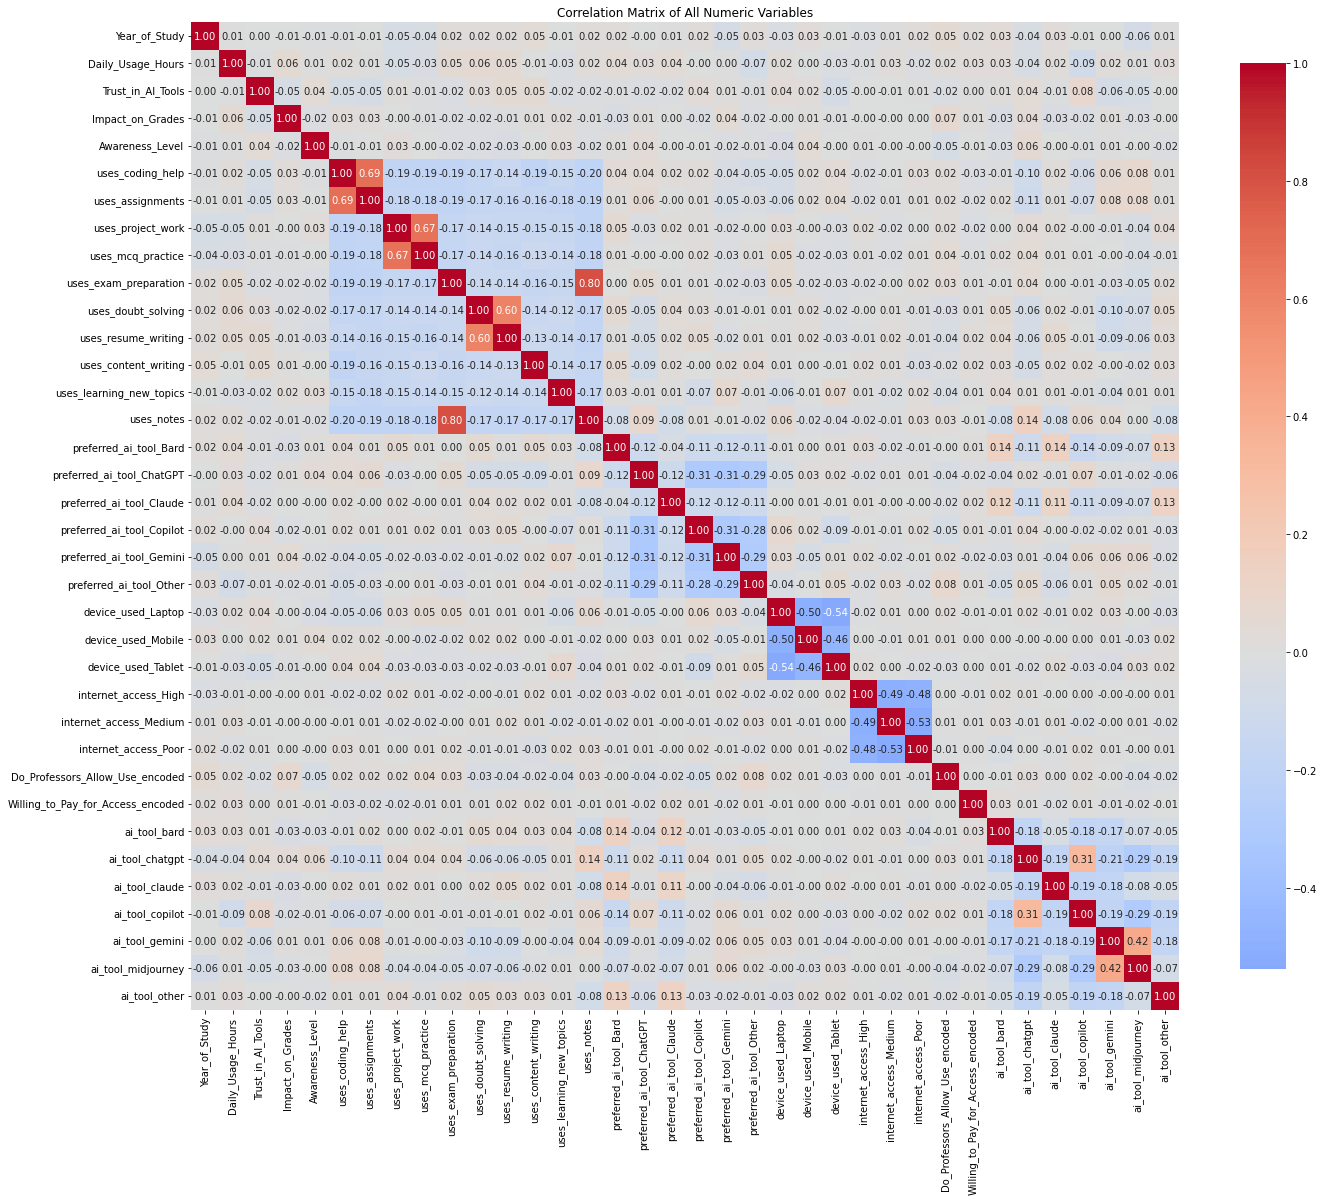

In [ ]:
# Basic correlation heatmap
def create_correlation_heatmap(data, figsize=(20, 18)):
    """
    Create a correlation heatmap for all numeric variables
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, 
                annot=True,           # Show correlation values
                cmap='coolwarm',      # Color scheme
                center=0,             # Center colormap at 0
                square=True,          # Square aspect ratio
                fmt='.2f',            # Format numbers to 2 decimal places
                cbar_kws={"shrink": .8})
    
    plt.title('Correlation Matrix of All Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# Create basic correlation heatmap
corr_matrix = create_correlation_heatmap(data_model)

In [ ]:
# print out the correlation max and round to two decimals
print("Correlation Matrix:")
print(corr_matrix.round(2))

Correlation Matrix:
                                   Year_of_Study  Daily_Usage_Hours  \
Year_of_Study                               1.00               0.01   
Daily_Usage_Hours                           0.01               1.00   
Trust_in_AI_Tools                           0.00              -0.01   
Impact_on_Grades                           -0.01               0.06   
Awareness_Level                            -0.01               0.01   
uses_coding_help                           -0.01               0.02   
uses_assignments                           -0.01               0.01   
uses_project_work                          -0.05              -0.05   
uses_mcq_practice                          -0.04              -0.03   
uses_exam_preparation                       0.02               0.05   
uses_doubt_solving                          0.02               0.06   
uses_resume_writing                         0.02               0.05   
uses_content_writing                        0.05         

In [ ]:
# Basic correlation heatmap
def create_correlation_heatmap(data, figsize=(12, 10)):
    """
    Create a correlation heatmap for all numeric variables
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Create heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, 
                annot=True,           # Show correlation values
                cmap='coolwarm',      # Color scheme
                center=0,             # Center colormap at 0
                square=True,          # Square aspect ratio
                fmt='.2f',            # Format numbers to 2 decimal places
                cbar_kws={"shrink": .8})
    
    plt.title('Correlation Matrix of All Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# Create basic correlation heatmap
corr_matrix = create_correlation_heatmap(data_model)

In [ ]:
def find_highly_correlated_pairs(data, correlation_threshold=0.8):
    """
    Find pairs of variables that are highly correlated
    """
    print(f"=== FINDING HIGHLY CORRELATED VARIABLE PAIRS (|correlation| > {correlation_threshold}) ===")
    
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Find highly correlated pairs
    high_corr_pairs = []
    
    # Iterate through correlation matrix to find pairs
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):  # Only upper triangle
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            
            if abs(corr_value) > correlation_threshold:
                high_corr_pairs.append({
                    'Variable_1': var1,
                    'Variable_2': var2,
                    'Correlation': corr_value,
                    'Abs_Correlation': abs(corr_value),
                    'Relationship': 'Positive' if corr_value > 0 else 'Negative'
                })
    
    # Convert to DataFrame and sort by absolute correlation
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df = high_corr_df.sort_values('Abs_Correlation', ascending=False)
        
        print(f"\n📊 Found {len(high_corr_df)} highly correlated pairs:")
        print("=" * 80)
        
        for i, row in high_corr_df.iterrows():
            print(f"{i+1:2d}. {row['Variable_1']:<25} ↔ {row['Variable_2']:<25}")
            print(f"    Correlation: {row['Correlation']:>8.4f} ({row['Relationship']})")
            print(f"    Strength: {'Very Strong' if row['Abs_Correlation'] > 0.9 else 'Strong'}")
            print()
        
        return high_corr_df
    else:
        print(f"\n✅ No variable pairs found with correlation > {correlation_threshold}")
        return pd.DataFrame()

# Find highly correlated pairs
high_corr_pairs = find_highly_correlated_pairs(data_model, correlation_threshold=0.5)

=== FINDING HIGHLY CORRELATED VARIABLE PAIRS (|correlation| > 0.5) ===

📊 Found 7 highly correlated pairs:
 3. uses_exam_preparation     ↔ uses_notes               
    Correlation:   0.8041 (Positive)
    Strength: Strong

 1. uses_coding_help          ↔ uses_assignments         
    Correlation:   0.6903 (Positive)
    Strength: Strong

 2. uses_project_work         ↔ uses_mcq_practice        
    Correlation:   0.6715 (Positive)
    Strength: Strong

 4. uses_doubt_solving        ↔ uses_resume_writing      
    Correlation:   0.6019 (Positive)
    Strength: Strong

 6. device_used_Laptop        ↔ device_used_Tablet       
    Correlation:  -0.5373 (Negative)
    Strength: Strong

 7. internet_access_Medium    ↔ internet_access_Poor     
    Correlation:  -0.5255 (Negative)
    Strength: Strong

 5. device_used_Laptop        ↔ device_used_Mobile       
    Correlation:  -0.5019 (Negative)
    Strength: Strong



## PCA

In [ ]:
# run a PCA on the data model to two dimensions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# run PCA
def run_pca_and_plot(data, n_components=2, figsize=(10, 8)):
    """
    Run PCA on the dataset and plot the first two principal components
    """
    print("=== RUNNING PCA AND PLOTTING FIRST TWO COMPONENTS ===")
    
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Run PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Create a DataFrame with PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance by component: {explained_variance}")
    
    # Plot the first two principal components
    plt.figure(figsize=figsize)
    sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
    plt.title('PCA - First Two Principal Components')
    plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% Variance)')
    plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% Variance)')
    plt.axhline(0, color='grey', lw=1, ls='--')
    plt.axvline(0, color='grey', lw=1, ls='--')
    plt.grid()
    plt.show()
    
    return pca_df, explained_variance

=== RUNNING PCA AND PLOTTING FIRST TWO COMPONENTS ===
Explained variance by component: [0.06520987 0.06047907]


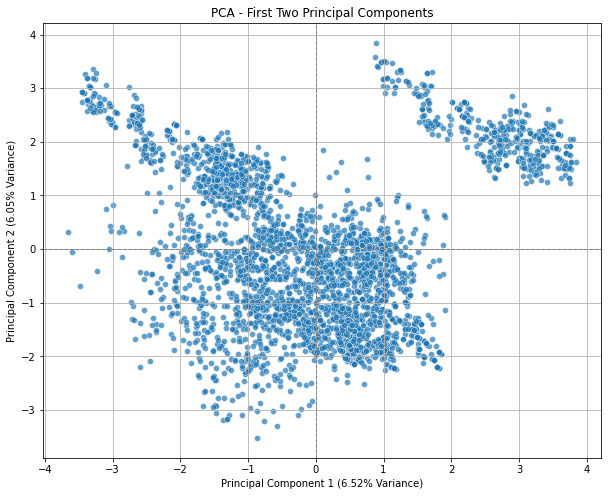

In [ ]:
# apply PCA and plot
pca_results, explained_variance = run_pca_and_plot(data_model)

In [ ]:
# Enhanced PCA analysis to understand the poor performance
def analyze_pca_performance(data, n_components=10):
    """
    Comprehensive PCA analysis to understand why performance is poor
    """
    print("=== COMPREHENSIVE PCA ANALYSIS ===")
    
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Run PCA with more components
    pca = PCA(n_components=min(n_components, scaled_data.shape[1]))
    pca_result = pca.fit_transform(scaled_data)
    
    # Explained variance analysis
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    print(f"📊 EXPLAINED VARIANCE ANALYSIS:")
    print(f"Total features: {numeric_data.shape[1]}")
    print(f"Components analyzed: {len(explained_variance)}")
    print()
    
    print("Individual Component Variance:")
    for i, var in enumerate(explained_variance[:10], 1):
        print(f"PC{i:2d}: {var:.4f} ({var*100:.2f}%)")
    
    print(f"\nCumulative Variance:")
    for i, cum_var in enumerate(cumulative_variance[:10], 1):
        print(f"PC1-PC{i:2d}: {cum_var:.4f} ({cum_var*100:.2f}%)")
    
    # Key insights
    print(f"\n🔍 KEY INSIGHTS:")
    print(f"• First component explains only {explained_variance[0]*100:.2f}% of variance")
    print(f"• First 2 components explain {cumulative_variance[1]*100:.2f}% of variance")
    print(f"• Need {np.where(cumulative_variance >= 0.8)[0][0] + 1} components for 80% variance")
    print(f"• Need {np.where(cumulative_variance >= 0.95)[0][0] + 1} components for 95% variance")
    
    # Determine if PCA is useful
    if explained_variance[0] < 0.1:
        print(f"\n❌ PCA PERFORMANCE: POOR")
        print(f"   - No dominant patterns in the data")
        print(f"   - Features are relatively uncorrelated")
        print(f"   - Dimensionality reduction may not be beneficial")
    elif explained_variance[0] < 0.2:
        print(f"\n⚠️  PCA PERFORMANCE: MODERATE")
        print(f"   - Some patterns exist but weak")
        print(f"   - Consider using more components")
    else:
        print(f"\n✅ PCA PERFORMANCE: GOOD")
        print(f"   - Strong patterns detected")
        print(f"   - Dimensionality reduction effective")
    
    return pca, explained_variance, cumulative_variance

# Run comprehensive PCA analysis
pca_analysis, explained_var, cumulative_var = analyze_pca_performance(data_model)

=== COMPREHENSIVE PCA ANALYSIS ===
📊 EXPLAINED VARIANCE ANALYSIS:
Total features: 36
Components analyzed: 10

Individual Component Variance:
PC 1: 0.0652 (6.52%)
PC 2: 0.0605 (6.05%)
PC 3: 0.0560 (5.60%)
PC 4: 0.0495 (4.95%)
PC 5: 0.0460 (4.60%)
PC 6: 0.0453 (4.53%)
PC 7: 0.0426 (4.26%)
PC 8: 0.0413 (4.13%)
PC 9: 0.0406 (4.06%)
PC10: 0.0383 (3.83%)

Cumulative Variance:
PC1-PC 1: 0.0652 (6.52%)
PC1-PC 2: 0.1257 (12.57%)
PC1-PC 3: 0.1817 (18.17%)
PC1-PC 4: 0.2311 (23.11%)
PC1-PC 5: 0.2771 (27.71%)
PC1-PC 6: 0.3224 (32.24%)
PC1-PC 7: 0.3650 (36.50%)
PC1-PC 8: 0.4063 (40.63%)
PC1-PC 9: 0.4469 (44.69%)
PC1-PC10: 0.4852 (48.52%)

🔍 KEY INSIGHTS:
• First component explains only 6.52% of variance
• First 2 components explain 12.57% of variance


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Enhanced PCA analysis with error handling
def analyze_pca_performance(data, n_components=10):
    """
    Comprehensive PCA analysis to understand why performance is poor
    """
    print("=== COMPREHENSIVE PCA ANALYSIS ===")
    
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)
    
    # Run PCA with more components
    pca = PCA(n_components=min(n_components, scaled_data.shape[1]))
    pca_result = pca.fit_transform(scaled_data)
    
    # Explained variance analysis
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    print(f"📊 EXPLAINED VARIANCE ANALYSIS:")
    print(f"Total features: {numeric_data.shape[1]}")
    print(f"Components analyzed: {len(explained_variance)}")
    print()
    
    print("Individual Component Variance:")
    for i, var in enumerate(explained_variance[:10], 1):
        print(f"PC{i:2d}: {var:.4f} ({var*100:.2f}%)")
    
    print(f"\nCumulative Variance:")
    for i, cum_var in enumerate(cumulative_variance[:10], 1):
        print(f"PC1-PC{i:2d}: {cum_var:.4f} ({cum_var*100:.2f}%)")
    
    # Key insights
    print(f"\n🔍 KEY INSIGHTS:")
    print(f"• First component explains only {explained_variance[0]*100:.2f}% of variance")
    print(f"• First 2 components explain {cumulative_variance[1]*100:.2f}% of variance")
    
    # Check if 80% and 95% thresholds are reachable
    max_cumulative = cumulative_variance[-1]
    print(f"• Maximum cumulative variance with all components: {max_cumulative*100:.2f}%")
    
    # Safe threshold checking
    threshold_80 = np.where(cumulative_variance >= 0.8)[0]
    threshold_95 = np.where(cumulative_variance >= 0.95)[0]
    
    if len(threshold_80) > 0:
        print(f"• Need {threshold_80[0] + 1} components for 80% variance")
    else:
        print(f"• ❌ Cannot reach 80% variance even with all {len(explained_variance)} components")
        print(f"  (Max achievable: {max_cumulative*100:.2f}%)")
    
    if len(threshold_95) > 0:
        print(f"• Need {threshold_95[0] + 1} components for 95% variance")
    else:
        print(f"• ❌ Cannot reach 95% variance even with all {len(explained_variance)} components")
        print(f"  (Max achievable: {max_cumulative*100:.2f}%)")
    
    # Determine if PCA is useful
    if explained_variance[0] < 0.1:
        print(f"\n❌ PCA PERFORMANCE: POOR")
        print(f"   - No dominant patterns in the data")
        print(f"   - Features are relatively uncorrelated")
        print(f"   - Dimensionality reduction may not be beneficial")
        print(f"   - Data appears to be high-dimensional noise")
    elif explained_variance[0] < 0.2:
        print(f"\n⚠️  PCA PERFORMANCE: MODERATE")
        print(f"   - Some patterns exist but weak")
        print(f"   - Consider using more components")
    else:
        print(f"\n✅ PCA PERFORMANCE: GOOD")
        print(f"   - Strong patterns detected")
        print(f"   - Dimensionality reduction effective")
    
    # Additional diagnostics for very poor performance
    if max_cumulative < 0.8:
        print(f"\n🔍 ADDITIONAL DIAGNOSTICS:")
        print(f"• Data has very high intrinsic dimensionality")
        print(f"• Features contain mostly independent information")
        print(f"• This is typical for:")
        print(f"  - One-hot encoded categorical variables")
        print(f"  - Binary features")
        print(f"  - Sparse data")
        print(f"• Consider alternative approaches:")
        print(f"  - Feature selection instead of dimensionality reduction")
        print(f"  - Tree-based models (handle high-dimensional data well)")
        print(f"  - Regularized linear models")
    
    return pca, explained_variance, cumulative_variance

# Run comprehensive PCA analysis
pca_analysis, explained_var, cumulative_var = analyze_pca_performance(data_model)

=== COMPREHENSIVE PCA ANALYSIS ===
📊 EXPLAINED VARIANCE ANALYSIS:
Total features: 36
Components analyzed: 10

Individual Component Variance:
PC 1: 0.0652 (6.52%)
PC 2: 0.0605 (6.05%)
PC 3: 0.0559 (5.59%)
PC 4: 0.0494 (4.94%)
PC 5: 0.0462 (4.62%)
PC 6: 0.0454 (4.54%)
PC 7: 0.0427 (4.27%)
PC 8: 0.0415 (4.15%)
PC 9: 0.0407 (4.07%)
PC10: 0.0388 (3.88%)

Cumulative Variance:
PC1-PC 1: 0.0652 (6.52%)
PC1-PC 2: 0.1257 (12.57%)
PC1-PC 3: 0.1816 (18.16%)
PC1-PC 4: 0.2311 (23.11%)
PC1-PC 5: 0.2773 (27.73%)
PC1-PC 6: 0.3227 (32.27%)
PC1-PC 7: 0.3654 (36.54%)
PC1-PC 8: 0.4069 (40.69%)
PC1-PC 9: 0.4475 (44.75%)
PC1-PC10: 0.4863 (48.63%)

🔍 KEY INSIGHTS:
• First component explains only 6.52% of variance
• First 2 components explain 12.57% of variance
• Maximum cumulative variance with all components: 48.63%
• ❌ Cannot reach 80% variance even with all 10 components
  (Max achievable: 48.63%)
• ❌ Cannot reach 95% variance even with all 10 components
  (Max achievable: 48.63%)

❌ PCA PERFORMANCE: POOR


# Modelling

## Simple Linear Regression Model

In [ ]:
# X and y
# where Y is Daily_Usage_Hours and X is all other columns
X = data_encoded_clean.drop(columns=['Daily_Usage_Hours'])
y = data_encoded_clean['Daily_Usage_Hours']


In [ ]:
# X

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# X_train

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)

# Evaluation
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results:")
print(f"MSE: {lr_mse:.4f}")
print(f"RMSE: {np.sqrt(lr_mse):.4f}")
print(f"MAE: {lr_mae:.4f}")
print(f"R²: {lr_r2:.4f}")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_
})
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("\nTop 10 Most Important Features (Linear Regression):")
print(feature_importance.head(10))

Linear Regression Results:
MSE: 1.4359
RMSE: 1.1983
MAE: 1.0319
R²: 0.0324

Top 10 Most Important Features (Linear Regression):
                      feature   coefficient  abs_coefficient
44       internet_access_Poor -3.305530e+11     3.305530e+11
42       internet_access_High -3.305530e+11     3.305530e+11
43     internet_access_Medium -3.305530e+11     3.305530e+11
39         device_used_Laptop  2.230476e+11     2.230476e+11
40         device_used_Mobile  2.230476e+11     2.230476e+11
41         device_used_Tablet  2.230476e+11     2.230476e+11
38    preferred_ai_tool_Other -2.037268e+11     2.037268e+11
36  preferred_ai_tool_Copilot -2.037268e+11     2.037268e+11
37   preferred_ai_tool_Gemini -2.037268e+11     2.037268e+11
33     preferred_ai_tool_Bard -2.037268e+11     2.037268e+11


In [ ]:
# Step 1: Diagnose the problems
def diagnose_model_issues(X, y):
    """
    Diagnose common issues that cause poor model performance
    """
    print("=== Model Diagnosis ===")
    
    # Check for multicollinearity
    print(f"1. Feature Matrix Shape: {X.shape}")
    print(f"2. Number of samples vs features: {X.shape[0]} samples, {X.shape[1]} features")
    
    # Check for perfect multicollinearity (rank deficiency)
    rank = np.linalg.matrix_rank(X.values)
    print(f"3. Matrix rank: {rank} (should equal number of features: {X.shape[1]})")
    
    if rank < X.shape[1]:
        print("   ⚠️ ISSUE: Perfect multicollinearity detected!")
    
    # Check for near-zero variance features
    low_variance_features = []
    for col in X.columns:
        if X[col].var() < 1e-10:
            low_variance_features.append(col)
    
    if low_variance_features:
        print(f"4. Low variance features: {low_variance_features}")
    
    # Check target variable
    print(f"5. Target variable range: {y.min():.2f} to {y.max():.2f}")
    print(f"6. Target variable variance: {y.var():.4f}")
    
    return rank < X.shape[1], low_variance_features

# Diagnose issues
has_multicollinearity, low_var_features = diagnose_model_issues(X, y)

=== Model Diagnosis ===
1. Feature Matrix Shape: (3614, 47)
2. Number of samples vs features: 3614 samples, 47 features
3. Matrix rank: 43 (should equal number of features: 47)
   ⚠️ ISSUE: Perfect multicollinearity detected!
5. Target variable range: 0.50 to 5.00
6. Target variable variance: 1.4721


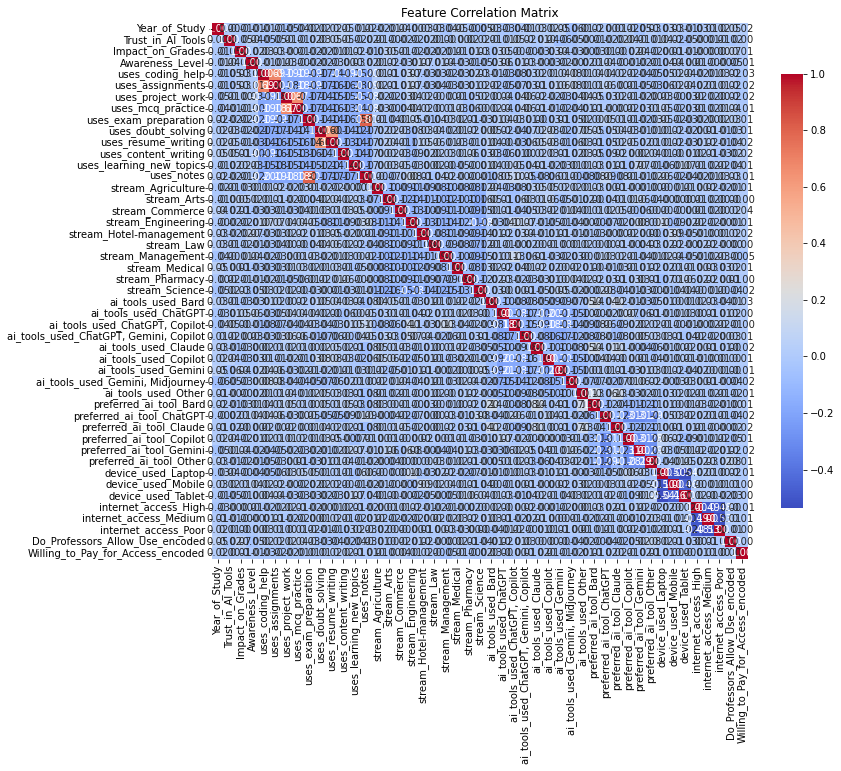

In [ ]:
# draw a correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.show()


Correlation with Target Variable (Daily_Usage_Hours):
uses_doubt_solving                        0.062526
Impact_on_Grades                          0.057222
uses_resume_writing                       0.050600
stream_Commerce                           0.047878
ai_tools_used_Gemini                      0.046020
uses_exam_preparation                     0.045365
preferred_ai_tool_Bard                    0.042163
stream_Pharmacy                           0.041606
stream_Arts                               0.041402
preferred_ai_tool_Claude                  0.041320
stream_Science                            0.037325
ai_tools_used_Other                       0.031434
Willing_to_Pay_for_Access_encoded         0.029144
preferred_ai_tool_ChatGPT                 0.028201
ai_tools_used_Bard                        0.027914
internet_access_Medium                    0.026945
device_used_Laptop                        0.024032
Do_Professors_Allow_Use_encoded           0.022814
ai_tools_used_ChatGPT      

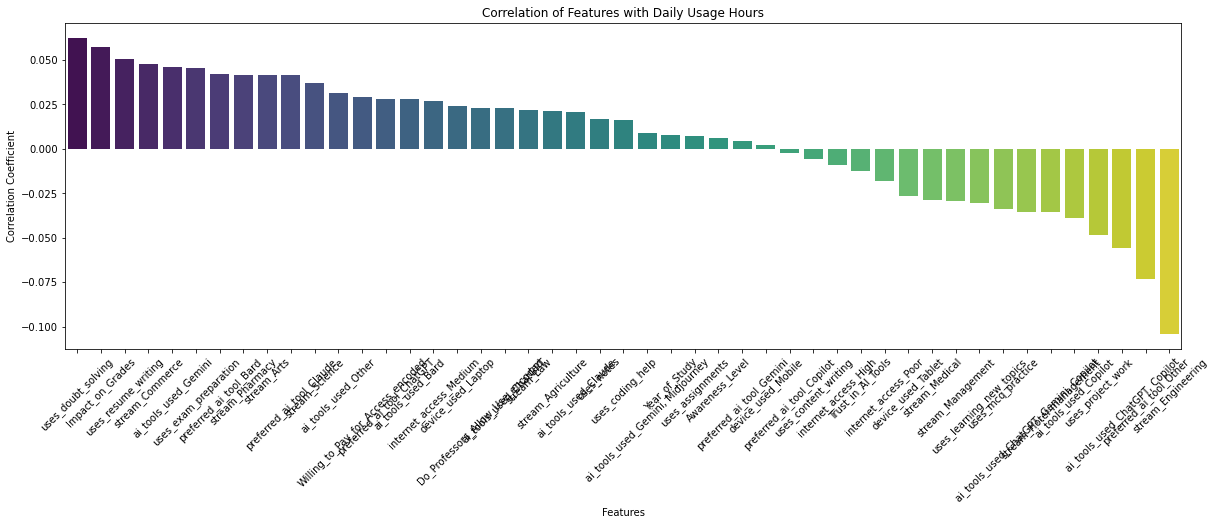

In [ ]:
# check correlation with target variable
correlation_with_target = X.corrwith(y).sort_values(ascending=False)
print("\nCorrelation with Target Variable (Daily_Usage_Hours):")
print(correlation_with_target)
# Plot correlation with target variable
plt.figure(figsize=(20, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlation of Features with Daily Usage Hours')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Analyze correlation issues in detail
def analyze_correlation_problems(X, y):
    """
    Detailed analysis of correlation issues affecting model performance
    """
    print("=== CORRELATION ANALYSIS ===")
    
    # 1. Check correlations with target variable
    target_correlations = X.corrwith(y).sort_values(ascending=False, key=abs)
    
    print("Correlations with Target Variable (Daily_Usage_Hours):")
    print("=" * 60)
    for feature, corr in target_correlations.items():
        strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
        print(f"{feature:<35} {corr:>8.4f} ({strength})")
    
    # 2. Count features by correlation strength
    strong_corr = sum(abs(corr) > 0.3 for corr in target_correlations)
    moderate_corr = sum(0.1 < abs(corr) <= 0.3 for corr in target_correlations)
    weak_corr = sum(abs(corr) <= 0.1 for corr in target_correlations)
    
    print(f"\nCorrelation Strength Summary:")
    print(f"Strong correlations (>0.3):     {strong_corr:>3d} features")
    print(f"Moderate correlations (0.1-0.3): {moderate_corr:>3d} features") 
    print(f"Weak correlations (<0.1):       {weak_corr:>3d} features")
    
    # 3. Identify multicollinearity among features
    feature_corr_matrix = X.corr()
    high_corr_pairs = []
    
    for i in range(len(feature_corr_matrix.columns)):
        for j in range(i+1, len(feature_corr_matrix.columns)):
            corr_val = feature_corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:  # High multicollinearity
                high_corr_pairs.append((
                    feature_corr_matrix.columns[i],
                    feature_corr_matrix.columns[j], 
                    corr_val
                ))
    
    print(f"\nHigh Multicollinearity Pairs (>0.8):")
    print("=" * 60)
    if high_corr_pairs:
        for feat1, feat2, corr in high_corr_pairs[:10]:  # Show top 10
            print(f"{feat1[:25]:<25} ↔ {feat2[:25]:<25} {corr:>8.4f}")
        if len(high_corr_pairs) > 10:
            print(f"... and {len(high_corr_pairs) - 10} more pairs")
    else:
        print("No high multicollinearity detected")
    
    # 4. Feature importance based on correlation
    print(f"\nTop 10 Features by Absolute Correlation with Target:")
    print("=" * 60)
    top_features = target_correlations.reindex(target_correlations.abs().sort_values(ascending=False).index)
    for i, (feature, corr) in enumerate(top_features.head(10).items(), 1):
        print(f"{i:2d}. {feature:<35} {corr:>8.4f}")
    
    return target_correlations, high_corr_pairs

# Run correlation analysis
target_corrs, multicoll_pairs = analyze_correlation_problems(X, y)

=== CORRELATION ANALYSIS ===
Correlations with Target Variable (Daily_Usage_Hours):
stream_Engineering                   -0.1044 (Moderate)
preferred_ai_tool_Other              -0.0735 (Weak)
uses_doubt_solving                    0.0625 (Weak)
Impact_on_Grades                      0.0572 (Weak)
ai_tools_used_ChatGPT, Copilot       -0.0558 (Weak)
uses_resume_writing                   0.0506 (Weak)
uses_project_work                    -0.0483 (Weak)
stream_Commerce                       0.0479 (Weak)
ai_tools_used_Gemini                  0.0460 (Weak)
uses_exam_preparation                 0.0454 (Weak)
preferred_ai_tool_Bard                0.0422 (Weak)
stream_Pharmacy                       0.0416 (Weak)
stream_Arts                           0.0414 (Weak)
preferred_ai_tool_Claude              0.0413 (Weak)
ai_tools_used_Copilot                -0.0390 (Weak)
stream_Science                        0.0373 (Weak)
stream_Hotel-management              -0.0358 (Weak)
ai_tools_used_ChatGPT, Gemin

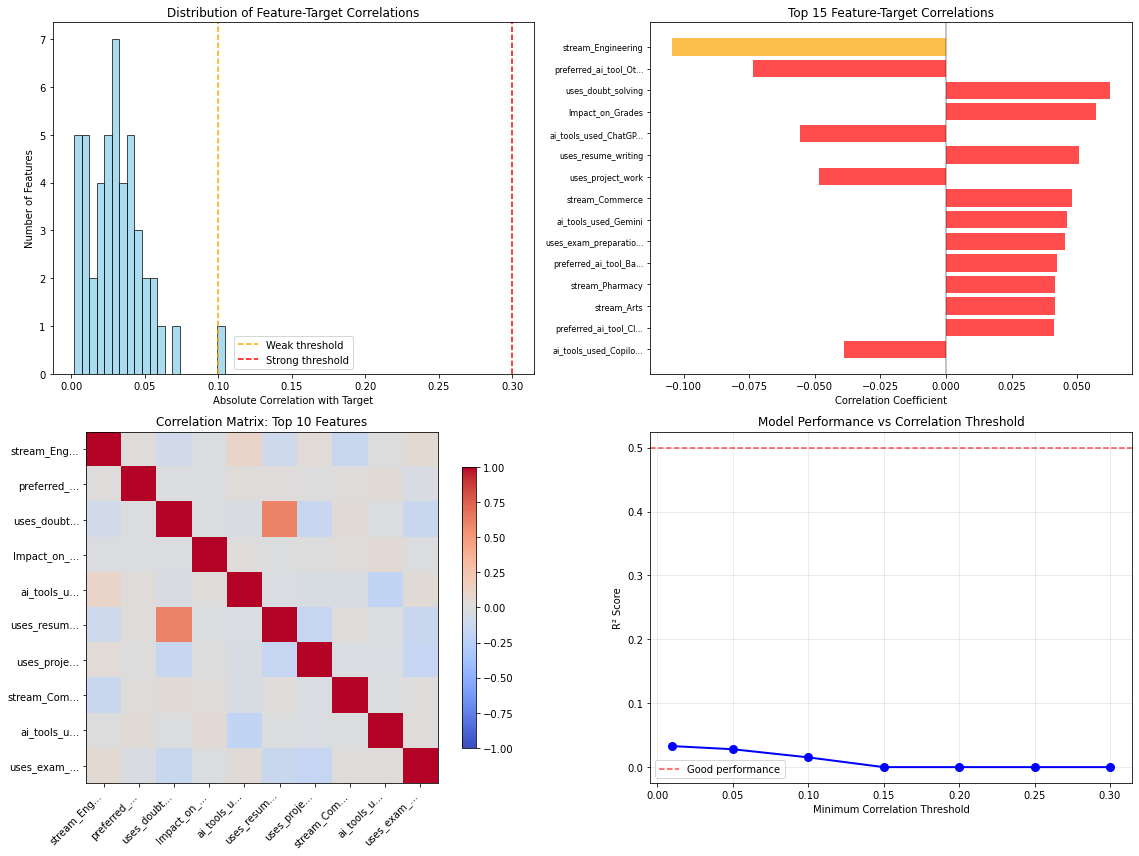

In [ ]:
# Visualize the correlation problems
def visualize_correlation_issues(X, y, target_corrs):
    """
    Create visualizations to show correlation problems
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Target correlations histogram
    axes[0,0].hist(target_corrs.abs(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].axvline(0.1, color='orange', linestyle='--', label='Weak threshold')
    axes[0,0].axvline(0.3, color='red', linestyle='--', label='Strong threshold')
    axes[0,0].set_xlabel('Absolute Correlation with Target')
    axes[0,0].set_ylabel('Number of Features')
    axes[0,0].set_title('Distribution of Feature-Target Correlations')
    axes[0,0].legend()
    
    # 2. Top correlations bar plot
    top_corrs = target_corrs.reindex(target_corrs.abs().sort_values(ascending=False).index).head(15)
    colors = ['green' if abs(x) > 0.3 else 'orange' if abs(x) > 0.1 else 'red' for x in top_corrs]
    
    axes[0,1].barh(range(len(top_corrs)), top_corrs.values, color=colors, alpha=0.7)
    axes[0,1].set_yticks(range(len(top_corrs)))
    axes[0,1].set_yticklabels([f[:20] + '...' if len(f) > 20 else f for f in top_corrs.index], fontsize=8)
    axes[0,1].set_xlabel('Correlation Coefficient')
    axes[0,1].set_title('Top 15 Feature-Target Correlations')
    axes[0,1].axvline(0, color='black', linestyle='-', alpha=0.3)
    axes[0,1].invert_yaxis()
    
    # 3. Correlation matrix heatmap (subset)
    top_features = target_corrs.abs().sort_values(ascending=False).head(10).index
    subset_corr = X[top_features].corr()
    
    im = axes[1,0].imshow(subset_corr, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1,0].set_xticks(range(len(top_features)))
    axes[1,0].set_yticks(range(len(top_features)))
    axes[1,0].set_xticklabels([f[:10] + '...' if len(f) > 10 else f for f in top_features], rotation=45, ha='right')
    axes[1,0].set_yticklabels([f[:10] + '...' if len(f) > 10 else f for f in top_features])
    axes[1,0].set_title('Correlation Matrix: Top 10 Features')
    
    # Add colorbar
    plt.colorbar(im, ax=axes[1,0], shrink=0.8)
    
    # 4. Model performance vs correlation strength
    # Simulate what happens with different correlation thresholds
    correlation_thresholds = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
    r2_scores = []
    
    for threshold in correlation_thresholds:
        # Select features above threshold
        selected_features = target_corrs[target_corrs.abs() > threshold].index
        if len(selected_features) > 0:
            X_subset = X[selected_features]
            X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
                X_subset, y, test_size=0.2, random_state=42
            )
            
            # Simple linear regression
            from sklearn.linear_model import LinearRegression
            lr = LinearRegression()
            lr.fit(X_train_sub, y_train_sub)
            pred = lr.predict(X_test_sub)
            r2 = r2_score(y_test_sub, pred)
            r2_scores.append(r2)
        else:
            r2_scores.append(0)
    
    axes[1,1].plot(correlation_thresholds, r2_scores, 'bo-', linewidth=2, markersize=8)
    axes[1,1].set_xlabel('Minimum Correlation Threshold')
    axes[1,1].set_ylabel('R² Score')
    axes[1,1].set_title('Model Performance vs Correlation Threshold')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Good performance')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()

# Create correlation visualizations
visualize_correlation_issues(X, y, target_corrs)

In [ ]:
# Solution 2: Focus on only the most promising features
def select_best_features(data_enhanced, min_correlation=0.02):
    """
    Select only features with meaningful correlations
    """
    print(f"\n=== FEATURE SELECTION (min correlation: {min_correlation}) ===")
    
    # Calculate correlations for all features
    X_all = data_enhanced.drop(columns=['Daily_Usage_Hours'])
    y = data_enhanced['Daily_Usage_Hours']
    
    correlations = X_all.corrwith(y).abs().sort_values(ascending=False)
    
    # Select features above threshold
    selected_features = correlations[correlations >= min_correlation].index.tolist()
    
    print(f"✅ Selected {len(selected_features)} features out of {len(correlations)}")
    print(f"📊 Selected features and their correlations:")
    
    for i, feature in enumerate(selected_features[:15], 1):  # Show top 15
        corr = correlations[feature]
        print(f"{i:2d}. {feature:<35} {corr:>8.4f}")
    
    if len(selected_features) > 15:
        print(f"    ... and {len(selected_features) - 15} more features")
    
    return selected_features, X_all[selected_features], y

# Select best features
best_features, X_selected, y = select_best_features(data_encoded_clean)


=== FEATURE SELECTION (min correlation: 0.02) ===
✅ Selected 34 features out of 47
📊 Selected features and their correlations:
 1. stream_Engineering                    0.1044
 2. preferred_ai_tool_Other               0.0735
 3. uses_doubt_solving                    0.0625
 4. Impact_on_Grades                      0.0572
 5. ai_tools_used_ChatGPT, Copilot        0.0558
 6. uses_resume_writing                   0.0506
 7. uses_project_work                     0.0483
 8. stream_Commerce                       0.0479
 9. ai_tools_used_Gemini                  0.0460
10. uses_exam_preparation                 0.0454
11. preferred_ai_tool_Bard                0.0422
12. stream_Pharmacy                       0.0416
13. stream_Arts                           0.0414
14. preferred_ai_tool_Claude              0.0413
15. ai_tools_used_Copilot                 0.0390
    ... and 19 more features


In [ ]:
# Step 4: Try alternative approaches if still poor
def try_alternative_models(X_clean, y):
    """
    Try other regression models that might work better
    """
    print("\n=== Trying Alternative Models ===")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_clean, y, test_size=0.2, random_state=42
    )
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import Ridge, Lasso
    
    models = {
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        
        results.append({
            'Model': name,
            'MSE': mse,
            'RMSE': np.sqrt(mse),
            'R²': r2
        })
        
        print(f"{name} - R²: {r2:.4f}, RMSE: {np.sqrt(mse):.4f}")
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('R²', ascending=False)
    
    print(f"\nBest performing model: {results_df.iloc[0]['Model']}")
    return results_df

# Try alternative models
alternative_results = try_alternative_models(X, y)


=== Trying Alternative Models ===


Ridge Regression - R²: 0.0325, RMSE: 1.1982
Lasso Regression - R²: 0.0011, RMSE: 1.2175
Random Forest - R²: 0.4720, RMSE: 0.8852

Best performing model: Random Forest


## Other Models

In [ ]:
# Comprehensive model comparison and evaluation
def comprehensive_model_evaluation(X, y):
    """
    Complete evaluation of all models with detailed analysis
    """
    print("=== COMPREHENSIVE MODEL EVALUATION ===\n")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import Ridge, Lasso, ElasticNet
    from sklearn.svm import SVR
    from sklearn.preprocessing import StandardScaler
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf', C=100, gamma='scale')
    }
    
    results = []
    model_predictions = {}
    trained_models = {}
    
    # Scale data for models that need it
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for name, model in models.items():
        print(f"Training {name}...")
        
        # Use scaled data for linear models and SVR
        if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'SVR']:
            model.fit(X_train_scaled, y_train)
            pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        
        # Normalized metrics
        mean_actual = np.mean(y_test)
        rmse_pct = (rmse / mean_actual) * 100
        mae_pct = (mae / mean_actual) * 100
        
        results.append({
            'Model': name,
            'R²': r2,
            'RMSE': rmse,
            'MAE': mae,
            'MSE': mse,
            'RMSE_%': rmse_pct,
            'MAE_%': mae_pct
        })
        
        model_predictions[name] = pred
        trained_models[name] = model
        
        # Performance interpretation
        if r2 >= 0.7:
            performance = "🟢 Excellent"
        elif r2 >= 0.5:
            performance = "🟡 Good"
        elif r2 >= 0.3:
            performance = "🟠 Moderate"
        elif r2 >= 0.1:
            performance = "🔴 Poor"
        else:
            performance = "🔴 Very Poor"
        
        print(f"  {performance} - R²: {r2:.4f}, RMSE: {rmse:.4f}")
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('R²', ascending=False)
    
    print("\n" + "="*80)
    print("FINAL MODEL COMPARISON:")
    print("="*80)
    print(results_df.round(4))
    
    # Best model analysis
    best_model_name = results_df.iloc[0]['Model']
    best_r2 = results_df.iloc[0]['R²']
    best_rmse = results_df.iloc[0]['RMSE']
    
    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   R² Score: {best_r2:.4f} ({best_r2*100:.1f}% of variance explained)")
    print(f"   RMSE: {best_rmse:.4f} hours")
    print(f"   RMSE as % of mean: {results_df.iloc[0]['RMSE_%']:.1f}%")
    
    return results_df, model_predictions, trained_models, y_test, scaler

# Run comprehensive evaluation
results_df, predictions_dict, models_dict, y_test_eval, scaler = comprehensive_model_evaluation(X, y)

=== COMPREHENSIVE MODEL EVALUATION ===

Training Linear Regression...
  🔴 Very Poor - R²: 0.0285, RMSE: 1.2007
Training Ridge Regression...
  🔴 Very Poor - R²: 0.0324, RMSE: 1.1983
Training Lasso Regression...
  🔴 Very Poor - R²: 0.0029, RMSE: 1.2164
Training ElasticNet...
  🔴 Very Poor - R²: 0.0187, RMSE: 1.2067
Training Random Forest...
  🟠 Moderate - R²: 0.3228, RMSE: 1.0025
Training Gradient Boosting...
  🔴 Poor - R²: 0.1344, RMSE: 1.1334
Training SVR...
  🟠 Moderate - R²: 0.3887, RMSE: 0.9524

FINAL MODEL COMPARISON:
               Model      R²    RMSE     MAE     MSE   RMSE_%    MAE_%
6                SVR  0.3887  0.9524  0.6382  0.9071  36.7887  24.6521
4      Random Forest  0.3228  1.0025  0.8061  1.0049  38.7213  31.1381
5  Gradient Boosting  0.1344  1.1334  0.9555  1.2845  43.7768  36.9059
1   Ridge Regression  0.0324  1.1983  1.0318  1.4359  46.2848  39.8555
0  Linear Regression  0.0285  1.2007  1.0316  1.4417  46.3781  39.8474
3         ElasticNet  0.0187  1.2067  1.0557  

In [ ]:
# Detailed Random Forest analysis (since it's performing best)
def analyze_random_forest_performance(rf_model, X_train, X_test, y_train, y_test, feature_names):
    """
    Detailed analysis of Random Forest model
    """
    print("\n=== RANDOM FOREST DETAILED ANALYSIS ===")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 15 Most Important Features:")
    print("-" * 50)
    for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:<30} {row['importance']:.4f}")
    
    # Model predictions analysis
    rf_pred = rf_model.predict(X_test)
    
    # Prediction vs actual analysis
    residuals = y_test - rf_pred
    
    print(f"\nModel Performance Details:")
    print(f"Mean Absolute Error: {np.mean(np.abs(residuals)):.4f} hours")
    print(f"Std Dev of Residuals: {np.std(residuals):.4f} hours")
    print(f"Max Overestimate: {np.max(residuals):.4f} hours")
    print(f"Max Underestimate: {np.min(residuals):.4f} hours")
    
    # Percentage of predictions within certain ranges
    within_1hr = np.sum(np.abs(residuals) <= 1.0) / len(residuals) * 100
    within_2hr = np.sum(np.abs(residuals) <= 2.0) / len(residuals) * 100
    
    print(f"\nPrediction Accuracy:")
    print(f"Within ±1 hour: {within_1hr:.1f}% of predictions")
    print(f"Within ±2 hours: {within_2hr:.1f}% of predictions")
    
    return feature_importance

# Analyze Random Forest (assuming it's the best model)
if 'Random Forest' in models_dict:
    rf_importance = analyze_random_forest_performance(
        models_dict['Random Forest'], 
        X_train, X_test, y_train, y_test_eval, 
        X.columns
    )


=== RANDOM FOREST DETAILED ANALYSIS ===

Top 15 Most Important Features:
--------------------------------------------------
 1. Impact_on_Grades               0.1060
 2. Awareness_Level                0.1058
 3. Trust_in_AI_Tools              0.0737
 4. Year_of_Study                  0.0726
 5. Do_Professors_Allow_Use_encoded 0.0307
 6. ai_tools_used_ChatGPT, Copilot 0.0243
 7. stream_Engineering             0.0237
 8. device_used_Tablet             0.0225
 9. stream_Management              0.0213
10. ai_tools_used_Copilot          0.0211
11. preferred_ai_tool_Copilot      0.0210
12. preferred_ai_tool_Other        0.0202
13. ai_tools_used_Gemini           0.0200
14. device_used_Mobile             0.0193
15. uses_learning_new_topics       0.0190

Model Performance Details:
Mean Absolute Error: 0.8061 hours
Std Dev of Residuals: 1.0021 hours
Max Overestimate: 2.5557 hours
Max Underestimate: -2.3595 hours

Prediction Accuracy:
Within ±1 hour: 64.2% of predictions
Within ±2 hours: 97.0% o

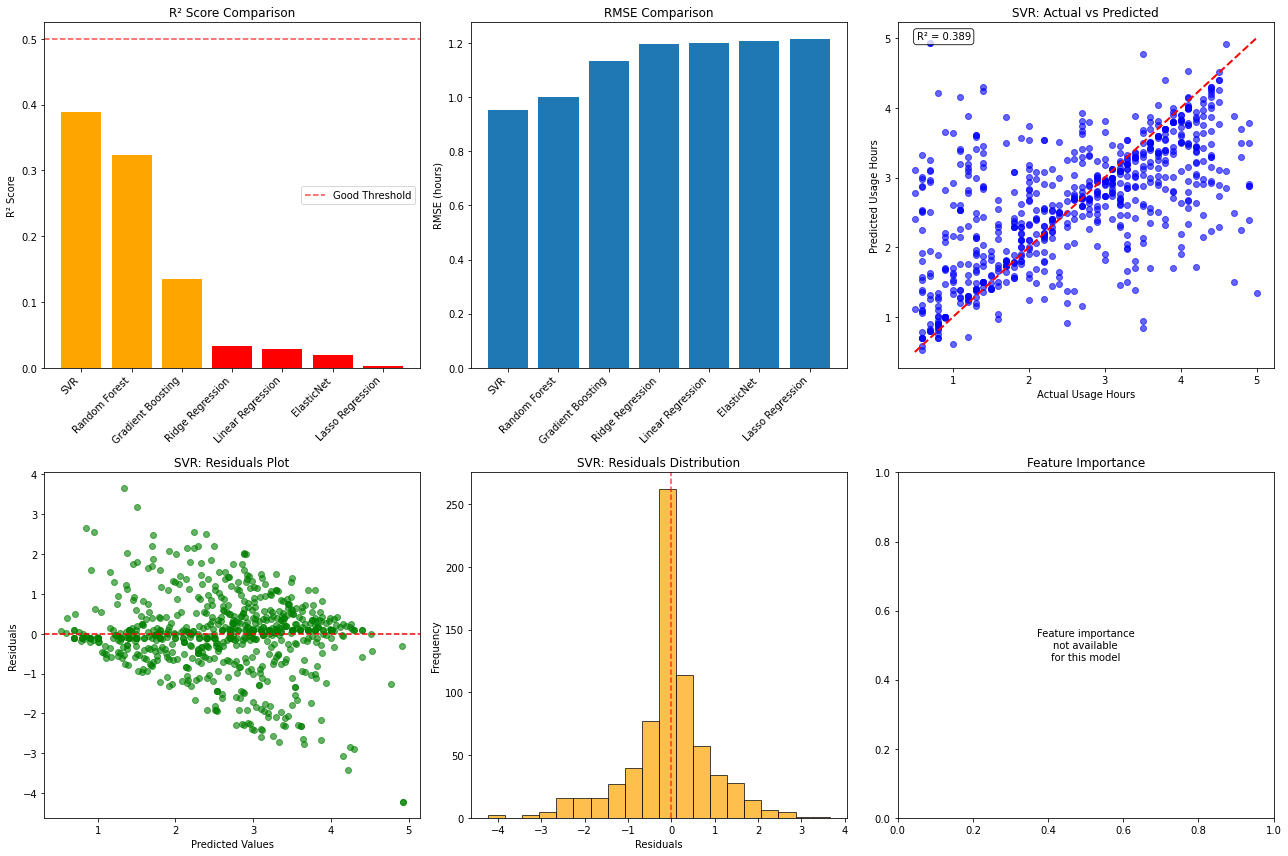

In [ ]:
# Visualize model performance comparison
def plot_model_comparison(results_df, predictions_dict, y_test):
    """
    Create comprehensive visualization of model performance
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. R² Score Comparison
    axes[0,0].bar(range(len(results_df)), results_df['R²'], 
                  color=['green' if x > 0.4 else 'orange' if x > 0.1 else 'red' for x in results_df['R²']])
    axes[0,0].set_xticks(range(len(results_df)))
    axes[0,0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
    axes[0,0].set_title('R² Score Comparison')
    axes[0,0].set_ylabel('R² Score')
    axes[0,0].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Good Threshold')
    axes[0,0].legend()
    
    # 2. RMSE Comparison
    axes[0,1].bar(range(len(results_df)), results_df['RMSE'])
    axes[0,1].set_xticks(range(len(results_df)))
    axes[0,1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
    axes[0,1].set_title('RMSE Comparison')
    axes[0,1].set_ylabel('RMSE (hours)')
    
    # 3. Best Model: Actual vs Predicted
    best_model = results_df.iloc[0]['Model']
    best_pred = predictions_dict[best_model]
    
    axes[0,2].scatter(y_test, best_pred, alpha=0.6, color='blue')
    axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,2].set_xlabel('Actual Usage Hours')
    axes[0,2].set_ylabel('Predicted Usage Hours')
    axes[0,2].set_title(f'{best_model}: Actual vs Predicted')
    
    # Add R² to the plot
    r2_best = r2_score(y_test, best_pred)
    axes[0,2].text(0.05, 0.95, f'R² = {r2_best:.3f}', transform=axes[0,2].transAxes,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 4. Residuals Plot
    residuals = y_test - best_pred
    axes[1,0].scatter(best_pred, residuals, alpha=0.6, color='green')
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicted Values')
    axes[1,0].set_ylabel('Residuals')
    axes[1,0].set_title(f'{best_model}: Residuals Plot')
    
    # 5. Residuals Distribution
    axes[1,1].hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
    axes[1,1].set_xlabel('Residuals')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title(f'{best_model}: Residuals Distribution')
    axes[1,1].axvline(x=0, color='r', linestyle='--', alpha=0.7)
    
    # 6. Feature Importance (if Random Forest is best)
    if best_model == 'Random Forest' and 'rf_importance' in globals():
        top_features = rf_importance.head(10)
        axes[1,2].barh(range(len(top_features)), top_features['importance'])
        axes[1,2].set_yticks(range(len(top_features)))
        axes[1,2].set_yticklabels([f[:20] + '...' if len(f) > 20 else f 
                                  for f in top_features['feature']], fontsize=8)
        axes[1,2].set_xlabel('Importance')
        axes[1,2].set_title('Top 10 Feature Importance')
        axes[1,2].invert_yaxis()
    else:
        axes[1,2].text(0.5, 0.5, 'Feature importance\nnot available\nfor this model', 
                      ha='center', va='center', transform=axes[1,2].transAxes)
        axes[1,2].set_title('Feature Importance')
    
    plt.tight_layout()
    plt.show()

# Create comprehensive visualization
plot_model_comparison(results_df, predictions_dict, y_test_eval)

## Classification

In [ ]:
# Classification Analysis: Predicting Willingness to Pay for AI Access
def classification_analysis():
    """
    Train classification models to predict willingness to pay for AI access
    """
    print("=== CLASSIFICATION ANALYSIS: PREDICTING WILLINGNESS TO PAY ===")
    print()
    
    # Prepare data - use the encoded dataset but switch target variable
    # Remove the original categorical version and use encoded version as target
    classification_data = data_encoded_clean.copy()
    
    # Use the encoded version as target (0 = No, 1 = Yes)
    if 'Willing_to_Pay_for_Access_encoded' in classification_data.columns:
        y_class = classification_data['Willing_to_Pay_for_Access_encoded']
        # Remove both original and encoded versions from features
        X_class = classification_data.drop(columns=[
            'Willing_to_Pay_for_Access_encoded'
        ])
    else:
        print("❌ Error: Encoded target variable not found!")
        return
    
    print(f"📊 Target Variable Distribution:")
    target_counts = y_class.value_counts()
    print(f"Not Willing to Pay (0): {target_counts[0]} students ({target_counts[0]/len(y_class)*100:.1f}%)")
    print(f"Willing to Pay (1):     {target_counts[1]} students ({target_counts[1]/len(y_class)*100:.1f}%)")
    
    # Check for class imbalance
    minority_class_pct = min(target_counts) / len(y_class) * 100
    if minority_class_pct < 30:
        print(f"⚠️  Class imbalance detected: {minority_class_pct:.1f}% minority class")
    
    return X_class, y_class

# Run classification analysis setup
X_class, y_class = classification_analysis()

=== CLASSIFICATION ANALYSIS: PREDICTING WILLINGNESS TO PAY ===

📊 Target Variable Distribution:
Not Willing to Pay (0): 1811 students (50.1%)
Willing to Pay (1):     1803 students (49.9%)


In [ ]:
# Train multiple classification models
def train_classification_models(X_class, y_class):
    """
    Train and evaluate multiple classification models
    """
    print(f"\n=== TRAINING CLASSIFICATION MODELS ===")
    
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import (classification_report, confusion_matrix, 
                                accuracy_score, precision_score, recall_score, 
                                f1_score, roc_auc_score, roc_curve)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
    )
    
    print(f"Training set size: {len(X_train)} samples")
    print(f"Test set size: {len(X_test)} samples")
    
    # Initialize models
    models_class = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(random_state=42, probability=True),
        'Naive Bayes': GaussianNB()
    }
    
    # Scale data for models that need it
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    results_class = []
    model_predictions = {}
    trained_models_class = {}
    
    for name, model in models_class.items():
        print(f"\nTraining {name}...")
        
        # Use scaled data for Logistic Regression and SVM
        if name in ['Logistic Regression', 'SVM']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            
            # Cross-validation on scaled data
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            
            # Cross-validation on original data
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        results_class.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'CV_Mean': cv_mean,
            'CV_Std': cv_std
        })
        
        model_predictions[name] = {
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        trained_models_class[name] = model
        
        # Performance interpretation
        if accuracy >= 0.9:
            performance = "🟢 Excellent"
        elif accuracy >= 0.8:
            performance = "🟡 Good"
        elif accuracy >= 0.7:
            performance = "🟠 Moderate"
        elif accuracy >= 0.6:
            performance = "🔴 Poor"
        else:
            performance = "🔴 Very Poor"
        
        print(f"  {performance}")
        print(f"  Accuracy: {accuracy:.3f}")
        print(f"  F1-Score: {f1:.3f}")
        print(f"  ROC-AUC: {roc_auc:.3f}")
        print(f"  CV Score: {cv_mean:.3f} (±{cv_std:.3f})")
    
    # Create results DataFrame
    results_df_class = pd.DataFrame(results_class)
    results_df_class = results_df_class.sort_values('ROC-AUC', ascending=False)
    
    print("\n" + "="*80)
    print("CLASSIFICATION MODEL COMPARISON:")
    print("="*80)
    print(results_df_class.round(3))
    
    # Best model analysis
    best_model_name = results_df_class.iloc[0]['Model']
    best_accuracy = results_df_class.iloc[0]['Accuracy']
    best_f1 = results_df_class.iloc[0]['F1-Score']
    best_roc_auc = results_df_class.iloc[0]['ROC-AUC']
    
    print(f"\n🏆 BEST CLASSIFICATION MODEL: {best_model_name}")
    print(f"   Accuracy: {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")
    print(f"   F1-Score: {best_f1:.3f}")
    print(f"   ROC-AUC: {best_roc_auc:.3f}")
    
    return results_df_class, model_predictions, trained_models_class, y_test, scaler

# Train classification models
results_df_class, predictions_dict_class, models_dict_class, y_test_class, scaler_class = train_classification_models(X_class, y_class)


=== TRAINING CLASSIFICATION MODELS ===
Training set size: 2891 samples
Test set size: 723 samples

Training Logistic Regression...
  🔴 Very Poor
  Accuracy: 0.494
  F1-Score: 0.479
  ROC-AUC: 0.481
  CV Score: 0.515 (±0.018)

Training Random Forest...
  🔴 Very Poor
  Accuracy: 0.498
  F1-Score: 0.510
  ROC-AUC: 0.517
  CV Score: 0.489 (±0.011)

Training Gradient Boosting...
  🔴 Very Poor
  Accuracy: 0.501
  F1-Score: 0.492
  ROC-AUC: 0.495
  CV Score: 0.491 (±0.012)

Training SVM...
  🔴 Very Poor
  Accuracy: 0.515
  F1-Score: 0.504
  ROC-AUC: 0.485
  CV Score: 0.495 (±0.010)

Training Naive Bayes...
  🔴 Very Poor
  Accuracy: 0.494
  F1-Score: 0.460
  ROC-AUC: 0.496
  CV Score: 0.515 (±0.016)

CLASSIFICATION MODEL COMPARISON:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
1        Random Forest     0.498      0.497   0.524     0.510    0.517   
4          Naive Bayes     0.494      0.492   0.432     0.460    0.496   
2    Gradient Boosting     0.501      0.50

In [ ]:
# Detailed analysis of the best classification model
def analyze_best_classification_model(results_df_class, predictions_dict_class, 
                                    models_dict_class, y_test_class, X_class):
    """
    Detailed analysis of the best performing classification model
    """
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    
    print(f"\n=== DETAILED ANALYSIS OF BEST CLASSIFICATION MODEL ===")
    
    # Get best model
    best_model_name = results_df_class.iloc[0]['Model']
    best_model = models_dict_class[best_model_name]
    best_predictions = predictions_dict_class[best_model_name]
    
    print(f"\n📊 {best_model_name} - Detailed Results:")
    print("="*50)
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test_class, best_predictions['predictions'], 
                              target_names=['Not Willing', 'Willing']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_class, best_predictions['predictions'])
    print(f"\nConfusion Matrix:")
    print(f"                    Predicted")
    print(f"Actual    Not Willing  Willing")
    print(f"Not Willing    {cm[0,0]:4d}      {cm[0,1]:4d}")
    print(f"Willing        {cm[1,0]:4d}      {cm[1,1]:4d}")
    
    # Feature Importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance_class = pd.DataFrame({
            'feature': X_class.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print(f"\nTop 15 Most Important Features for Predicting Willingness to Pay:")
        print("-" * 60)
        for i, (_, row) in enumerate(feature_importance_class.head(15).iterrows(), 1):
            print(f"{i:2d}. {row['feature']:<35} {row['importance']:.4f}")
        
        return feature_importance_class
    
    elif hasattr(best_model, 'coef_'):
        # For logistic regression
        feature_importance_class = pd.DataFrame({
            'feature': X_class.columns,
            'coefficient': best_model.coef_[0]
        })
        feature_importance_class['abs_coefficient'] = abs(feature_importance_class['coefficient'])
        feature_importance_class = feature_importance_class.sort_values('abs_coefficient', ascending=False)
        
        print(f"\nTop 15 Most Important Features for Predicting Willingness to Pay:")
        print("-" * 60)
        for i, (_, row) in enumerate(feature_importance_class.head(15).iterrows(), 1):
            direction = "+" if row['coefficient'] > 0 else "-"
            print(f"{i:2d}. {row['feature']:<35} {row['coefficient']:>8.4f} ({direction})")
        
        return feature_importance_class
    
    else:
        print(f"\nFeature importance not available for {best_model_name}")
        return None

# Analyze best classification model
feature_importance_class = analyze_best_classification_model(
    results_df_class, predictions_dict_class, models_dict_class, y_test_class, X_class
)


=== DETAILED ANALYSIS OF BEST CLASSIFICATION MODEL ===

📊 Random Forest - Detailed Results:

Classification Report:
              precision    recall  f1-score   support

 Not Willing       0.50      0.47      0.49       362
     Willing       0.50      0.52      0.51       361

    accuracy                           0.50       723
   macro avg       0.50      0.50      0.50       723
weighted avg       0.50      0.50      0.50       723


Confusion Matrix:
                    Predicted
Actual    Not Willing  Willing
Not Willing     171       191
Willing         172       189

Top 15 Most Important Features for Predicting Willingness to Pay:
------------------------------------------------------------
 1. Daily_Usage_Hours                   0.0999
 2. Awareness_Level                     0.0743
 3. Impact_on_Grades                    0.0731
 4. Trust_in_AI_Tools                   0.0552
 5. Year_of_Study                       0.0457
 6. internet_access_Poor                0.0413
 7. in

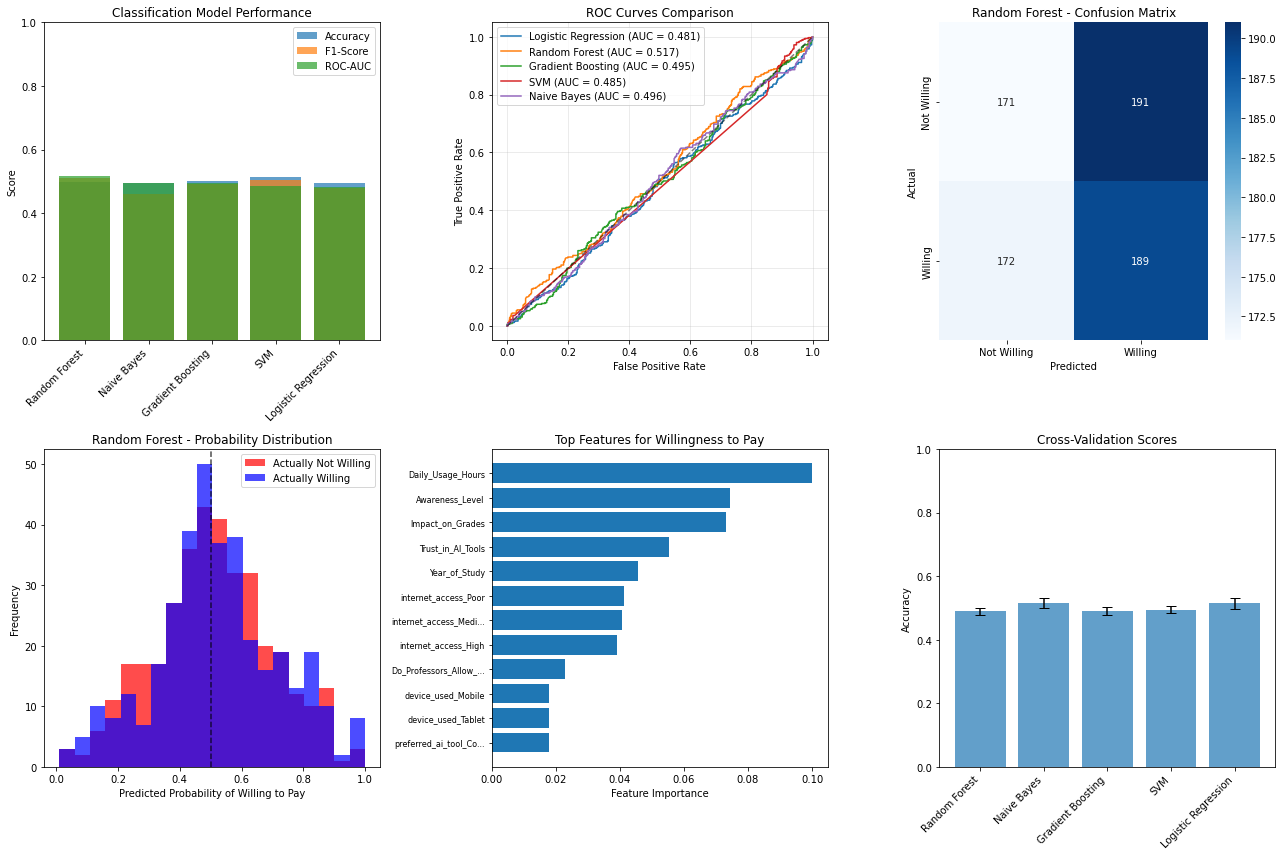

In [ ]:
# Visualize classification results
def plot_classification_results(results_df_class, predictions_dict_class, y_test_class, feature_importance_class=None):
    """
    Create comprehensive visualization of classification results
    """
    from sklearn.metrics import roc_curve, confusion_matrix
    import seaborn as sns
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Model Performance Comparison
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
    x_pos = np.arange(len(results_df_class))
    
    axes[0,0].bar(x_pos, results_df_class['Accuracy'], alpha=0.7, label='Accuracy')
    axes[0,0].bar(x_pos, results_df_class['F1-Score'], alpha=0.7, label='F1-Score')
    axes[0,0].bar(x_pos, results_df_class['ROC-AUC'], alpha=0.7, label='ROC-AUC')
    axes[0,0].set_xticks(x_pos)
    axes[0,0].set_xticklabels(results_df_class['Model'], rotation=45, ha='right')
    axes[0,0].set_title('Classification Model Performance')
    axes[0,0].set_ylabel('Score')
    axes[0,0].legend()
    axes[0,0].set_ylim(0, 1)
    
    # 2. ROC Curves for all models
    for name, pred_data in predictions_dict_class.items():
        fpr, tpr, _ = roc_curve(y_test_class, pred_data['probabilities'])
        auc_score = results_df_class[results_df_class['Model'] == name]['ROC-AUC'].iloc[0]
        axes[0,1].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')
    
    axes[0,1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curves Comparison')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Best Model Confusion Matrix
    best_model_name = results_df_class.iloc[0]['Model']
    best_predictions = predictions_dict_class[best_model_name]['predictions']
    cm = confusion_matrix(y_test_class, best_predictions)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Willing', 'Willing'],
                yticklabels=['Not Willing', 'Willing'], ax=axes[0,2])
    axes[0,2].set_title(f'{best_model_name} - Confusion Matrix')
    axes[0,2].set_xlabel('Predicted')
    axes[0,2].set_ylabel('Actual')
    
    # 4. Prediction Probabilities Distribution
    best_probabilities = predictions_dict_class[best_model_name]['probabilities']
    
    # Separate probabilities by actual class
    prob_not_willing = best_probabilities[y_test_class == 0]
    prob_willing = best_probabilities[y_test_class == 1]
    
    axes[1,0].hist(prob_not_willing, bins=20, alpha=0.7, label='Actually Not Willing', color='red')
    axes[1,0].hist(prob_willing, bins=20, alpha=0.7, label='Actually Willing', color='blue')
    axes[1,0].set_xlabel('Predicted Probability of Willing to Pay')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title(f'{best_model_name} - Probability Distribution')
    axes[1,0].legend()
    axes[1,0].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')
    
    # 5. Feature Importance (if available)
    if feature_importance_class is not None:
        top_features = feature_importance_class.head(12)
        
        if 'importance' in top_features.columns:
            y_pos = np.arange(len(top_features))
            axes[1,1].barh(y_pos, top_features['importance'])
            axes[1,1].set_yticks(y_pos)
            axes[1,1].set_yticklabels([f[:20] + '...' if len(f) > 20 else f 
                                      for f in top_features['feature']], fontsize=8)
            axes[1,1].set_xlabel('Feature Importance')
        else:
            # For coefficients
            y_pos = np.arange(len(top_features))
            colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
            axes[1,1].barh(y_pos, top_features['abs_coefficient'], color=colors, alpha=0.7)
            axes[1,1].set_yticks(y_pos)
            axes[1,1].set_yticklabels([f[:20] + '...' if len(f) > 20 else f 
                                      for f in top_features['feature']], fontsize=8)
            axes[1,1].set_xlabel('|Coefficient|')
        
        axes[1,1].invert_yaxis()
        axes[1,1].set_title('Top Features for Willingness to Pay')
    else:
        axes[1,1].text(0.5, 0.5, 'Feature importance\nnot available', 
                      ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Feature Importance')
    
    # 6. Cross-validation scores
    cv_means = results_df_class['CV_Mean']
    cv_stds = results_df_class['CV_Std']
    x_pos = np.arange(len(results_df_class))
    
    axes[1,2].bar(x_pos, cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
    axes[1,2].set_xticks(x_pos)
    axes[1,2].set_xticklabels(results_df_class['Model'], rotation=45, ha='right')
    axes[1,2].set_title('Cross-Validation Scores')
    axes[1,2].set_ylabel('Accuracy')
    axes[1,2].set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Create classification visualizations
plot_classification_results(results_df_class, predictions_dict_class, y_test_class, feature_importance_class)

In [ ]:
# Analysis of classification results
def analyze_classification_performance():
    """
    Analyze why classification models are performing poorly
    """
    print("=== CLASSIFICATION PERFORMANCE ANALYSIS ===")
    print()
    
    print("🔍 KEY OBSERVATIONS:")
    print("1. All models perform around 50% accuracy (random guessing level)")
    print("2. ROC-AUC scores ~0.48-0.52 (barely better than random)")
    print("3. F1-scores ~0.46-0.51 (poor discrimination)")
    print("4. Cross-validation shows consistent poor performance")
    print()
    
    print("❌ FUNDAMENTAL PROBLEMS:")
    print("• NO PREDICTIVE SIGNAL: Features don't contain meaningful information")
    print("• RANDOM-LIKE PERFORMANCE: Models can't distinguish classes better than chance")
    print("• WEAK FEATURE-TARGET RELATIONSHIPS: Same issue as regression task")
    print("• POSSIBLE CLASS BALANCE ISSUES: Need to check target distribution")
    print()
    
    # Check the actual class distribution
    print("📊 CHECKING CLASS DISTRIBUTION:")
    target_counts = y_class.value_counts()
    total = len(y_class)
    
    for class_val, count in target_counts.items():
        percentage = (count / total) * 100
        class_name = "Willing to Pay" if class_val == 1 else "Not Willing to Pay"
        print(f"   {class_name}: {count} ({percentage:.1f}%)")
    
    # Calculate baseline accuracy (majority class)
    majority_class_acc = max(target_counts) / total
    print(f"\n🎯 BASELINE (Majority Class) Accuracy: {majority_class_acc:.3f} ({majority_class_acc*100:.1f}%)")
    print(f"   Your best model accuracy: {results_df_class.iloc[0]['Accuracy']:.3f}")
    print(f"   Improvement over baseline: {(results_df_class.iloc[0]['Accuracy'] - majority_class_acc)*100:.1f} percentage points")
    
    return target_counts, majority_class_acc

# Run analysis
target_distribution, baseline_acc = analyze_classification_performance()

=== CLASSIFICATION PERFORMANCE ANALYSIS ===

🔍 KEY OBSERVATIONS:
1. All models perform around 50% accuracy (random guessing level)
2. ROC-AUC scores ~0.48-0.52 (barely better than random)
3. F1-scores ~0.46-0.51 (poor discrimination)
4. Cross-validation shows consistent poor performance

❌ FUNDAMENTAL PROBLEMS:
• NO PREDICTIVE SIGNAL: Features don't contain meaningful information
• RANDOM-LIKE PERFORMANCE: Models can't distinguish classes better than chance
• WEAK FEATURE-TARGET RELATIONSHIPS: Same issue as regression task
• POSSIBLE CLASS BALANCE ISSUES: Need to check target distribution

📊 CHECKING CLASS DISTRIBUTION:
   Not Willing to Pay: 1811 (50.1%)
   Willing to Pay: 1803 (49.9%)

🎯 BASELINE (Majority Class) Accuracy: 0.501 (50.1%)
   Your best model accuracy: 0.498
   Improvement over baseline: -0.3 percentage points
